<a href="https://colab.research.google.com/github/VithorioMarques/Projeto_PLN_2023Q2/blob/main/Projeto2_PLN_TLoU_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Análise do script do jogo "The Last of Us part I" usando técnicas de Processamento de Linguagem Natural (PLN)</h1>

<hr>

<h2>Universidade Federal do ABC</h2>

<h4>Centro de Matemática, Computação e Cognição (CMCC) - Bacharelado em Ciência da Computação</h3>

<h4>Vithório da Cunha Marques | RA: 11201920812</h4>
<h4>Lucas Montagnani Calil Elias | RA: 11201920895</h4>
<hr>

<h1>Introdução</h1>

"The Last of Us" é um jogo de ação e aventura pós-apocalíptico desenvolvido pela Naughty Dog e lançado exclusivamente para o PlayStation 3 em 2013. O jogo se passa em um mundo onde uma infecção fúngica devastou a população, transformando a maioria dos seres humanos em criaturas agressivas semelhantes a zumbis chamadas "infectados".

O jogo segue a história de Joel, um contrabandista que vive na zona de quarentena de Boston, e Ellie, uma jovem que é imune à infecção. Joel tem a tarefa de escoltar Ellie pelo país até um grupo de combatentes da resistência chamado Fireflies, que acreditam que a imunidade de Ellie poderia levar a uma cura para a infecção.

A jogabilidade combina elementos de tiro em terceira pessoa e furtividade, já que os jogadores devem navegar por vários ambientes enquanto evitam ou enfrentam inimigos infectados e hostis. O jogo também apresenta um sistema de criação, onde os jogadores podem procurar recursos para criar armas, kits de saúde e outros itens.

"The Last of Us" recebeu aclamação da crítica por sua narrativa, desenvolvimento de personagens e mecânica de jogabilidade. Ganhou vários prêmios, incluindo vários prêmios "Jogo do Ano", e foi posteriormente remasterizado e lançado para o PlayStation 4. Uma sequência, "The Last of Us Part II", foi lançada em 2020.

Referência: Gerado por ChatGPT-4


**ATENÇÃO: este trabalho possui spoiler dos acontecimentos do jogo.**

<h1>Objetivos</h1>

<h4>Gerais</h4>

* Praticar algumas técnicas de Processamento de Linguagem Natural aprendidas durante as aulas utilizando linguagem Python
* Ganhar experiência com tratamento de datasets de linguagem natural

<h4>Análise de sentimentos</h4>

* Utilizar técnicas de Processamento de Linguagem Natural para identificar e analisar a polaridade dos sentimentos das personagens do jogo.
* Analisar como a análise de sentimentos pode ser utilizada como ferramenta para melhorar o entendimento das relações entre as personagens do jogo.

<h4>Modelagem de tópicos</h4>

* Identificar os tópicos mais relevantes presentes no script do jogo.
* Avaliar a coerência dos tópicos gerados em relação à história do jogo.

<h4>Reconhecimento de Entidades Nomeadas</h4>

*   Construir um grafo que represente as relações presentes nos dialogos dos personagens;
*   A partir do grafo analisar as metricas as quais podem forncer informações valiosas sobre os relacionamentos entre os personagens e sua evolução ao longo da história.

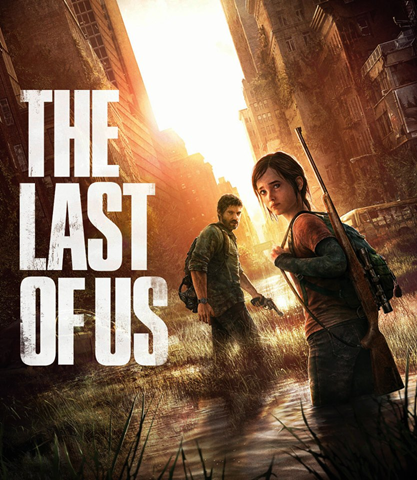



# Download das dependências para web scraping

In [ ]:
!pip install requests        #for web requests
!pip install beautifulsoup4  #for web scraping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Processamento do texto

##Função de remoção das stop words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

print(len(stopwords))
print(stopwords)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(text):
  stop_words = stopwords.words('english')
  # Remove stop words
  tokens = [token for token in text.split() if token.lower() not in stop_words]
  # Join not removed words
  text_clean = ' '.join(tokens)
  return text_clean

##The Last of Us part I

Obtendo script de "The Last of Us part I" em um arquivo txt no Google Drive

In [ ]:
from bs4 import BeautifulSoup
import requests

#Source for TLoU 1 script: "https://gamefaqs.gamespot.com/ps3/652686-the-last-of-us/faqs/68485" Last access: 04/08/2023 MM/DD/YYYY
target_url = "https://drive.google.com/uc?id=1jYsssW5BYiNcgm_n948LtxF9skgwWMNS&export=download"
response = requests.get(target_url)
tlou1_script = response.content.decode('utf-8')
print(tlou1_script)



    _____ _   _ _____   _          ____ _____   _____ _____   _   _ ____
   |_   _| | | |  ___| | |    /¯\ |  __|_   _| |     |  ___| | | | |  __|
     | | | |_| | |_    | |   /   \| |__  | |   | (¯) | |_    | | | | |__
     | | |  _  |  _|   | |  ( (¯) )__  | | |   | | | |  _|   | | | |__  |
     | | | | | | |___  | |__|  ¯  |__| | | |   | (_) | |     | |_| |__| |
     |_| |_| |_|_____| |____|_|¯|_|____| |_|   |_____|_|     |_____|____|
 Game Script by Shotgunnova (P. Summers) / Email: shotgunnova(a+)gmail(d0t)com


   01) Prologue - Hometown ............................................. GS01
   02) Summer - The Quarantine Zone .................................... GS02
   03) Summer - The Outskirts .......................................... GS03
   04) Summer - Bill's Town ............................................ GS04
   05) Summer - Pittsburgh ............................................. GS05
   06) Summer - The Suburbs ............................................ GS06
   07) 

Obtendo os nomes dos capítulos

In [ ]:
import re
tlou1_chapters_name = []
for chap_name in re.findall("\d*\).*\s\.", tlou1_script):
  tlou1_chapters_name.append(chap_name[:len(chap_name)-2])

for i in range(2): tlou1_chapters_name.pop(-1)

print(tlou1_chapters_name)

['01) Prologue - Hometown', '02) Summer - The Quarantine Zone', '03) Summer - The Outskirts', "04) Summer - Bill's Town", '05) Summer - Pittsburgh', '06) Summer - The Suburbs', "07) Fall - Tommy's Dam", '08) Fall - The University', '09) Winter - Lakeside Resort', '10) Spring - Bus Depot', '11) Spring - The Firefly Lab', '12) Epilogue - Jackson']


Segregando capítulos em **tlou1_chap_text** respectivamente ao index em **tlou1_chapters_name**

In [ ]:
tlou1_chap_text = []

tmp = tlou1_script[tlou1_script.index("_______________________________________________________________________________"):]

for i in range(len(tlou1_chapters_name)):
  index = tmp.index(tlou1_chapters_name[i][:3])
  if(i == len(tlou1_chapters_name)-1):
    tlou1_chap_text.append(tmp[index:tlou1_script.index("13.")])
  else:
    tlou1_chap_text.append(tmp[index:tmp.index(tlou1_chapters_name[i+1][:3])])

print(tlou1_chap_text)

['01) HOMETOWN                                                  [PROLOGUE] [GS01]\n_______________________________________________________________________________\n¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯\n\n[Setting: Texas. Joel walks into his house late at night, on the phone.]\n\nJoel: Tommy, I-...Tommy. Tommy, listen to me. He\'s the contractor, okay? I\n      can\'t lose this job. I understand... Let\'s talk about this in the\n      morning, okay? We\'ll talk about it in the morning. Alright, goodnight.\n\n[He turns on the light, waking his daughter on the couch.]\n\nSarah: Hey.\n\nJoel: Scoot.\n\nSarah: Fun day at work, huh?\n\nJoel: What are you still doing up? It\'s late.\n\nSarah: Oh crud. What time is it?\n\nJoel: It\'s way past your bedtime.\n\nSarah: But it\'s still today.\n\nJoel: Honey, please not right now. I do not have the energy for this.\n\n[She gets out a small gift box from nearby.]\n\nSarah: Here.\n\nJoel: What\'s this?\n\nSa

Removendo descrições das cenas.

In [ ]:
for x in re.findall("\[.*\]", tlou1_script):
   tlou1_script = tlou1_script.replace(x, "")


Obtendo lista de personagens

In [ ]:
tlou1_characters = []

for character in re.findall("\n\n.*:", tlou1_script):
  if(character[2:character.index(":")] not in tlou1_characters):
    tlou1_characters.append(character[2:character.index(":")])

tlou1_characters.pop(-1) #' Allowed Sites:                       Disallowed Sites:'

print(tlou1_characters)
print(len(tlou1_characters))

['Joel', 'Sarah', 'Tommy', 'Reporter', 'Cop', 'Passerby', 'Motorist', 'Soldier', 'Clip', 'Tess', 'Loudspeaker', 'Man', 'Woman', 'Guard', 'Guard 2', 'Infected', 'System', 'Terence', 'Malick', 'Goon', 'Goon 2', 'Goon 3', 'Sentry', 'Sentry 2', 'Sentry 3', 'Sentry 4', 'Robert', 'Voice', 'Marlene', 'Voice 2', 'Voice 1', 'Girl', 'Ellie', 'Patrol', 'Patrol 2', 'Soldier 2', 'Radio', 'Bill', 'Hunter', 'Hunter 2', 'Hunter 3', 'Hunter 4', 'Hunter 3 ', 'Hunter 5', 'Dying Woman', 'Kid', 'Henry', 'Sam', 'Maria', 'Earl', 'Man 2', 'Man 3', 'Man 4', 'David', 'James', 'Hunter 6', 'Hunter 7', 'Hunter 8', 'Hunter 9', 'Hunter 10', 'Female Hunter', 'Firefly', 'Firefly 2', 'Firefly 3', 'Nurse', 'Doctor', 'Doctor 2', 'Firefly 4', 'Firefly 5', 'Firefly 6', 'Firefly 7', 'Firefly 8', 'Firefly 9']
73


##The Last of Us part II

Web scraping TLoU part II para obter html da página com o script

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://game-scripts-wiki.blogspot.com/2020/10/the-last-of-us-part-ii-full-transcript.html"

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')

Separando o conteúdo html para obter o script do jogo

In [ ]:
script_start = str(soup).index('''<div id="post-toc"><div class="separator" style="clear: both;''')
script_end = str(soup).index('''font size="5"><center>THE END</center></font></div>''')

tlou2_script = str(soup)[script_start:script_end + len('''font size="5"><center>THE END</center></font></div>''')]
print(tlou2_script)

<div id="post-toc"><div class="separator" style="clear: both;"><a href="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiA6mUFeAI4gh1R6Oepvho8HSzJsAtprgjkBntS53sVxLGY0_Ht8LqyK_0ZmHX00-gEQzqOAsCibwZKlsVqN-pmNquszGXhEjzHl9-t7tf-ua7PreuKsy-lXw6PDZGmk9latL6U9_89lYavIHNbfAYHq_9O-gihD6pQoqLm0ONwUWSIN7LlkwrSy6Hg/s1600/the-last-of-us-2.jpg" style="display: block; padding: 1em 0; text-align: center; "><img alt="" border="0" data-original-height="675" data-original-width="1200" src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiA6mUFeAI4gh1R6Oepvho8HSzJsAtprgjkBntS53sVxLGY0_Ht8LqyK_0ZmHX00-gEQzqOAsCibwZKlsVqN-pmNquszGXhEjzHl9-t7tf-ua7PreuKsy-lXw6PDZGmk9latL6U9_89lYavIHNbfAYHq_9O-gihD6pQoqLm0ONwUWSIN7LlkwrSy6Hg/s1600/the-last-of-us-2.jpg"/></a></div>
<a name="more"></a>
Be sure to refresh in memory <a href="https://gamefaqs.gamespot.com/ps3/652686-the-last-of-us/faqs/68485" target="_blank">the first game</a> beautifully scripted by Shotgunnova.<br/>
<br/>
<h2> JACKSON </h

Obtendo os nomes dos capítulos

In [ ]:
import re

tlou2_chapters_name = re.findall("<h2>.*</h2>", tlou2_script)

for i in range(1,4):
  index = tlou2_script.index(tlou2_chapters_name[i])
  tlou2_script = tlou2_script[:index] + tlou2_chapters_name[i][:17] + ' / Ellie</h2>' + tlou2_script[index + len(tlou2_chapters_name[i]):]
  index = tlou2_script.index(tlou2_chapters_name[i])
  tlou2_script = tlou2_script[:index] + tlou2_chapters_name[i][:17] + ' / Abby</h2>' + tlou2_script[index + len(tlou2_chapters_name[i]):]

index = tlou2_script.index(tlou2_chapters_name[7])
tlou2_script = tlou2_script[:index] + tlou2_chapters_name[7][:12] + ' 1</h2>' + tlou2_script[index + len(tlou2_chapters_name[7]):]
index = tlou2_script.index(tlou2_chapters_name[7])
tlou2_script = tlou2_script[:index] + tlou2_chapters_name[7][:12] + ' 2</h2>' + tlou2_script[index + len(tlou2_chapters_name[7]):]

tlou2_chapters_name = re.findall("<h2>.*</h2>", tlou2_script)
for i in range(len(tlou2_chapters_name)):
  tlou2_chapters_name[i] = tlou2_chapters_name[i].replace("<h2>",'')
  tlou2_chapters_name[i] = tlou2_chapters_name[i].replace("</h2>",'')

tlou2_chapters_name[0] = tlou2_chapters_name[0].strip()
print(tlou2_chapters_name)

['JACKSON', 'SEATTLE DAY 1 / Ellie', 'SEATTLE DAY 2 / Ellie', 'SEATTLE DAY 3 / Ellie', 'SEATTLE DAY 1 / Abby', 'SEATTLE DAY 2 / Abby', 'SEATTLE DAY 3 / Abby', 'THE FARM 1', 'SANTA BARBARA', 'THE FARM 2']


Segregando capítulos em **tlou2_chap_text** respectivamente ao index em **tlou2_chapters_name** e removendo as tags html

In [ ]:
tlou2_chap_text = []

for i in range(len(tlou2_chapters_name)):
  index = tlou2_script.index(tlou2_chapters_name[i])
  if(i == len(tlou2_chapters_name)-1):
    tlou2_chap_text.append(tlou2_script[index:])
  else:
    tlou2_chap_text.append(tlou2_script[index:tlou2_script.index(tlou2_chapters_name[i+1])])

for i in range(len(tlou2_chap_text)):
  for tag in re.findall("\<.*\>", tlou2_chap_text[i]):
    tlou2_chap_text[i] = tlou2_chap_text[i].replace(tag, '')

print(tlou2_chap_text)

['JACKSON \n\n\n<b>Joel:</b> I don’t know what happened. I was supposed to take her to the Fireflies and walk away. You go halfway across the country with someone... She needed her immunity to mean somethin’. Maybe I was starting to buy into that whole... cure business. Maybe I just wanted to do right by her. And then we made it. We found the Fireflies. And because of her... They were actually going to make a cure. The only catch... it would kill her.\n\n<i>[We jump to the events of the first game. Joel bursts into the operating room. The surgeon grabs the scalpel from the stand and threatens him.]</i>\n\n<b>Joel:</b> Sweet Jesus.\n\n<b>Nurse:</b> Doctor?\n\n<b>Surgeon:</b> What are you doing in here? I won’t let you take her. This is our future, think of all the lives we’ll save.\n\n<i>[We return to the present. The man who is sitting opposite Joel is Tommy.]</i>\n\n<b>Tommy:</b> Jesus Christ, Joel. What’d you do?\n\n<b>Joel:</b> I saved her.\n\n<i>[We see the footage of a bloody hosp

Removendo descrições das cenas e tags \<br/\>

In [ ]:
for x in re.findall("<i>\[.*\]</i><br/>", tlou2_script):
   tlou2_script = tlou2_script.replace(x, "")

tlou2_script = tlou2_script.replace("<br/>", "")

print(tlou2_script)

<div id="post-toc"><div class="separator" style="clear: both;"><a href="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiA6mUFeAI4gh1R6Oepvho8HSzJsAtprgjkBntS53sVxLGY0_Ht8LqyK_0ZmHX00-gEQzqOAsCibwZKlsVqN-pmNquszGXhEjzHl9-t7tf-ua7PreuKsy-lXw6PDZGmk9latL6U9_89lYavIHNbfAYHq_9O-gihD6pQoqLm0ONwUWSIN7LlkwrSy6Hg/s1600/the-last-of-us-2.jpg" style="display: block; padding: 1em 0; text-align: center; "><img alt="" border="0" data-original-height="675" data-original-width="1200" src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiA6mUFeAI4gh1R6Oepvho8HSzJsAtprgjkBntS53sVxLGY0_Ht8LqyK_0ZmHX00-gEQzqOAsCibwZKlsVqN-pmNquszGXhEjzHl9-t7tf-ua7PreuKsy-lXw6PDZGmk9latL6U9_89lYavIHNbfAYHq_9O-gihD6pQoqLm0ONwUWSIN7LlkwrSy6Hg/s1600/the-last-of-us-2.jpg"/></a></div>
<a name="more"></a>
Be sure to refresh in memory <a href="https://gamefaqs.gamespot.com/ps3/652686-the-last-of-us/faqs/68485" target="_blank">the first game</a> beautifully scripted by Shotgunnova.

<h2> JACKSON </h2>


<b>Jo

Obtendo lista de personagens

In [ ]:
tlou2_characters = []

for character in re.findall("<b>.*:", tlou2_script):
  if(character[3:character.index(":")] not in tlou2_characters):
    tlou2_characters.append(character[3:character.index(":")])

print(tlou2_characters)
print(len(tlou2_characters))

['Joel', 'Nurse', 'Surgeon', 'Tommy', 'Firefly', 'Ellie', 'Jesse', 'Woman', 'Maria', 'Seth', 'Dina', 'Kid', 'Man', 'Abby', 'Owen', 'Ellile', 'Mel', 'Nora', 'Elie', 'Jordan', 'WLF Soldier', 'Radio', 'Dispatcher', 'Seraphite', 'Jerry', 'Marlene', 'Manny', 'Mr. Alvarez', 'Isaac', 'Yara', 'Lev', 'Fat Man', 'Rattler', 'Prisoner']
34


# Análise exploratória

## Função para gerar nuvem de palavras (word cloud)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
  # Criar um objeto WordCloud com as configurações desejadas
  wc = WordCloud(background_color='white', max_words=500, width=800, height=400)

  # Gerar a nuvem de palavras
  nuvem = wc.generate(remove_stopwords(text))

  # Exibir a nuvem de palavras
  plt.imshow(nuvem, interpolation='bilinear')
  plt.axis('off')
  plt.show()

## The Last of Us part I

Removendo nomes dos personagens e stop words

In [ ]:
tmp = tlou1_script
for character in tlou1_characters:
  tmp = tmp.replace(character + ':', '')

tmp = remove_stopwords(tmp)

print(tmp)
print(type(tmp))

### Palavras mais frequentes

In [ ]:
import pandas as pd
# Dividir a string em palavras
palavras = tmp
palavras = palavras.replace('-','')
palavras = palavras.replace('_','')
palavras = palavras.replace('|','')
palavras = palavras.replace('¯','')
palavras = palavras.replace('.','')
palavras = palavras.replace(',','')
palavras = palavras.replace('\'',' ')
palavras = palavras.replace('\?','')
palavras = palavras.replace('\!','')
palavras = palavras.replace(' s ','')
palavras = palavras.replace(' ll ','')
palavras = palavras.replace(' t ','')
palavras = palavras.replace(' m ','')
palavras = palavras.split()

for i in range(len(palavras)):
  palavras[i] = palavras[i].lower()
# Contar as ocorrências de cada palavra
contagem = pd.Series(palavras).value_counts().nlargest(100)

# Criar um gráfico de barras para visualizar a distribuição de palavras
contagem.plot(kind='bar', figsize=(20, 6))
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Distribuição de Palavras')
plt.show()


Podemos ver quem as palavras mais frequentes são palavras imperativas e de confirmação, o que é condizente com as situações de hierarquia recorrentes na trama do jogo. Além disso também podemos identificar os nomes dos personagens principais (Ellie e Joel), nome de uma das duas organizações fundamentais do jogo ("Fireflies") e palavras que indicam surpresa ou que aconteceu algo indesejado ("shit", "fuck", "ah", "hell").

### Word cloud

Gerando nuvem de palavras.

In [ ]:
generate_wordcloud(tmp)

Na nuvem de palavras acima podemos ver que as palavras mais utilizadas durante todo o jogo são palavras de confirmação como "Yeah", "Aright" e "Okay", o que é esperado dado o contexto do jogo em que o Joel orienta Ellie durante toda a jornada para sobreviverem e chegarem ao local final de seu objetivo.

Com isso podemos inferir que a relação predominante entre as personagens é hierárquica. O que também é verossímil uma vez que em um mundo pós-apocalíptico é esperado que as pessoas se organizem em grupos com hierarquia bem definida para aumentar suas chances de sobrevivência.

Também observamos que há bastante uso dos nomes "Joel" e "Ellie", que são as personagens principais, e há xingamentos como "fuck" e "shit", que expressam que algo no decorrer da história deu errado para as personagens, o que também é esperado visto que a história se trata dos obstáculos enfrentados por Joel e Ellie para alcançarem seu objetivo final.

### Número de caracteres por capítulo (chapter length)

In [ ]:
import pandas as pd

# Criar um DataFrame com dados de texto
df = pd.DataFrame({'Chapters': tlou1_chap_text})

# Definir uma função para contar o número de caracteres em cada frase
def contar_caracteres(frase):
    return len(frase)

# Aplicar a função ao DataFrame
df['Characters_Number'] = df['Chapters'].apply(contar_caracteres)

# Exibir o resultado
print(df)

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico de dispersão
plt.scatter(df.index, df['Characters_Number'])
#plt.scatter(df['usuario'], df['num_caracteres'])

# Definir o título e os rótulos dos eixos
plt.title('Characters number in each chapter')
plt.xlabel('Chapter')
plt.xticks(range(len(tlou1_chapters_name)) ,tlou1_chapters_name, rotation=90)
plt.ylabel('Characters number')

# Exibir o gráfico
plt.show()

O capítulo 5 é o com mais caracteres. Ao pesquisar sobre os acontecimentos neste capítulo é possível encontrar justificativas para esse fato.

É um capítulo com a introdução de dois personagens (Sam e Henry) que tiveram um grande impacto na história. São dois irmãos que lutam junto de Ellie e Joel para sobreviver durante esse capítulo e ocorre uma identificação entre Joel e Henry, pois ambos estão protegendo alguém importante para eles, e entre Sam e Ellie, pois têm a idade mais próxima e se tornam amigos.

Ao final do próximo capítulo, Sam e Henry morrem. Isso causa um grande impacto emocional em Ellie e Joel, que são relembrados da realidade do mundo pós-apocalíptico em que vivem, e isso pode ser a causa da queda na quantidade de caracteres nos próximos capítulos devido ao luto de ambos.

Também é possível observar que o capítulo 12 é o que possui a menor quantidade de caracteres, o que é compreensível ao analisar a história, pois o clímax do jogo já ocorreu no capítulo anterior.

Este capítulo foi escrito para finalizar o jogo com poucos diálogos entre Ellie e Joel ao mesmo tempo que mostra a situação do relacionamento entre eles e deixa uma possibilidade de continuação da história em um segundo jogo em aberto (que se concretizou com o lançamento de The Last of Us part II).

## The Last of Us part II

### Word cloud

Removendo nomes dos personagens, \\n, tags html e stop words

In [ ]:
tmp = tlou2_chap_text.copy()

for i in range(len(tmp)):
  for character in re.findall("<b>.*</b>", tmp[i]):
    tmp[i] = tmp[i].replace(character, '')

  for tag in re.findall("\<.*\>", tmp[i]):
    tmp[i] = tmp[i].replace(character,'')
  tmp[i] = tmp[i].replace("\n",'')

for i in range(len(tmp)):
  tmp[i] = remove_stopwords(tmp[i])

print(tmp)
print(len(tmp))

['JACKSON don’t know happened. supposed take Fireflies walk away. go halfway across country someone... needed immunity mean somethin’. Maybe starting buy whole... cure business. Maybe wanted right her. made it. found Fireflies. her... actually going make cure. catch... would kill her.<i>[We jump events first game. Joel bursts operating room. surgeon grabs scalpel stand threatens him.]</i> Sweet Jesus. Doctor? here? won’t let take her. future, think lives we’ll save.<i>[We return present. man sitting opposite Joel Tommy.]</i> Jesus Christ, Joel. What’d do? saved her.<i>[We see footage bloody hospital. many corpses everywhere.]</i> C’mon, baby girl. gotcha. gotcha.<i>[The siren turned on.]</i> (via speaker) Cover exits! Don’t let get away! Oh shit.<i>[Joel grabs Ellie smoke runs operating room. go back present.]</i> Goddamn. That’s... That’s lot. Ellie know? told ran tests. told her... immunity meant nothin’. believed you? Didn’t say otherwise. head back.<i>[Tommy takes jacket leaves. Jo

Gerando nuvem de palavras

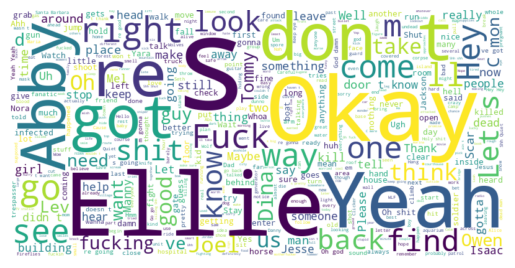

In [ ]:
generate_wordcloud(' '.join(tmp))

### Número de caracteres por capítulo (chapter length)

In [ ]:
import pandas as pd

# Criar um DataFrame com dados de texto
df = pd.DataFrame({'Chapters': tmp})

# Definir uma função para contar o número de caracteres em cada frase
def contar_caracteres(frase):
    return len(frase)

# Aplicar a função ao DataFrame
df['Characters_Number'] = df['Chapters'].apply(contar_caracteres)

# Exibir o resultado
print(df)

                                            Chapters  Characters_Number
0  JACKSON don’t know happened. supposed take Fir...              29694
1  SEATTLE DAY 1 / Ellie hunter top him... drowni...              34149
2  SEATTLE DAY 2 / Ellie (radio static) (retching...              20988
3  SEATTLE DAY 3 / Ellie Dina? Jesse? (reads post...              12746
4  SEATTLE DAY 1 / Abby Abby. Yo. Easy. okay, Abs...              31223
5  SEATTLE DAY 2 / Abby (distant whistles) Shit! ...              11081
6  SEATTLE DAY 3 / Abby Even make it, she’s going...              13219
7  FARM 1 Abby! Hey, buddy. What’s wrong? got you...               7040
8  SANTA BARBARA (reads sign) 2425 Constance. 242...               8960
9  FARM 2 Hey. What’re drinking? Coffee. Where’d ...                711


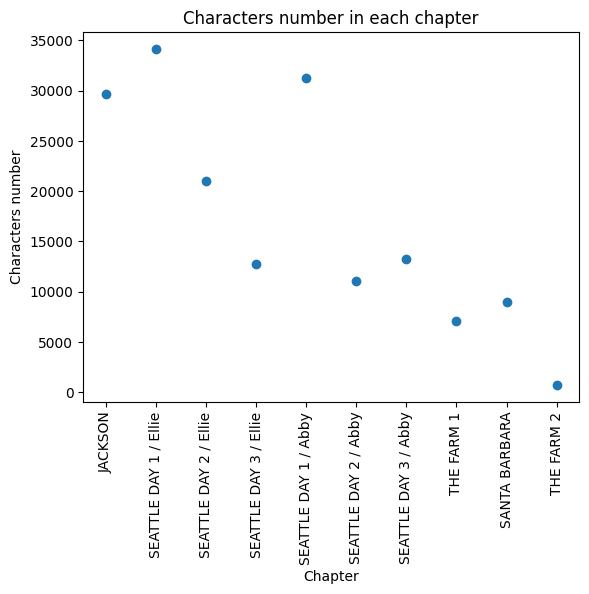

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico de dispersão
plt.scatter(df.index, df['Characters_Number'])
#plt.scatter(df['usuario'], df['num_caracteres'])

# Definir o título e os rótulos dos eixos
plt.title('Characters number in each chapter')
plt.xlabel('Chapter')
plt.xticks(range(len(tlou2_chapters_name)) ,tlou2_chapters_name, rotation=90)
plt.ylabel('Characters number')

# Exibir o gráfico
plt.show()

# Análise de sentimentos

## Testando bibliotecas

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline


# Carregando o modelo de análise de sentimentos
classifier = pipeline('sentiment-analysis')

In [ ]:
from textblob import TextBlob

blob = TextBlob(tlou1_script)

blob.sentiment.polarity

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# instanciar o analisador de sentimentos
sid = SentimentIntensityAnalyzer()

# realizar a análise de sentimentos
sentimentos = sid.polarity_scores(tlou1_script)

# imprimir os resultados
print("Sentimentos:", sentimentos)

## Funções úteis

In [ ]:
def Get_character_lines(character, script=tlou1_script):
  #get all lines of character in script. Returns a list of lines
  text = re.findall(f"{character}:.*\\n\\n", script)
  for i in range(len(text)):
    text[i] = text[i].replace(f"{character}: ", "")
  return text

def Get_sentiment_analisys(character, script=tlou1_script):
  #returns sentiment polarity of a character's lines in a script
  text = Get_character_lines(character, script)
  text = remove_stopwords(' '.join(text))
  blob = TextBlob(text)

  return blob.sentiment.polarity#(f"{character} sentiment polarity: {blob.sentiment.polarity}")

Decidimos utilizar a biblioteca TextBlob porque a transformers possui limite de caracteres inferior ao tamanhos dos documentos aqui utilizados para os inputs. Além disso o TextBlob também oferece outputs mais fáceis de tratar para gerar gráficos quando em comparação com o nltk e o vader.

## The Last of Us part I

Polaridade dos sentimentos de cada personagem no decorrer do jogo como um todo.

In [ ]:
for character in tlou1_characters:
  polarity = Get_sentiment_analisys(character)
  print(f"{character} sentimen polarity: {polarity}")

Polaridade dos sentimentos de cada personagem em cada capítulo. Permite análise das mudanças de sentimento no decorrer do jogo.

In [ ]:
tlou1_character_speech_per_chapter = [] #[character_index][chapter_index]

for character_index in range(len(tlou1_characters)):
  tmp_chap_list = []
  for chapter_index in range(len(tlou1_chap_text)):
    text = re.findall(f"{tlou1_characters[character_index]}:.*\\n\\n", tlou1_chap_text[chapter_index])
    for i in range(len(text)):
      text[i] = text[i].replace(f"{tlou1_characters[character_index]}: ", "")
    tmp_chap_list.append(text)
  tlou1_character_speech_per_chapter.append(tmp_chap_list)

for i in range(len(tlou1_character_speech_per_chapter)):
  for j in range(len(tlou1_character_speech_per_chapter[i])):
    blob = TextBlob(' '.join(tlou1_character_speech_per_chapter[i][j]))
    print(f"{tlou1_characters[i]} in chapter {tlou1_chapters_name[j]} sentimen polarity: {blob.sentiment.polarity}")

Personagens com maior quantidade de falas

In [ ]:
from collections import Counter
tmp = {}
tlou1_character_speech_entire_game = []
for character in tlou1_characters:
  tlou1_character_speech_entire_game.append(Get_character_lines(character))

for i in range(len(tlou1_character_speech_entire_game)):
  tmp[f"{tlou1_characters[i]}"] = len(tlou1_character_speech_entire_game[i])


dict(Counter(tmp).most_common(15))

### Análise de sentimentos

#### Joel

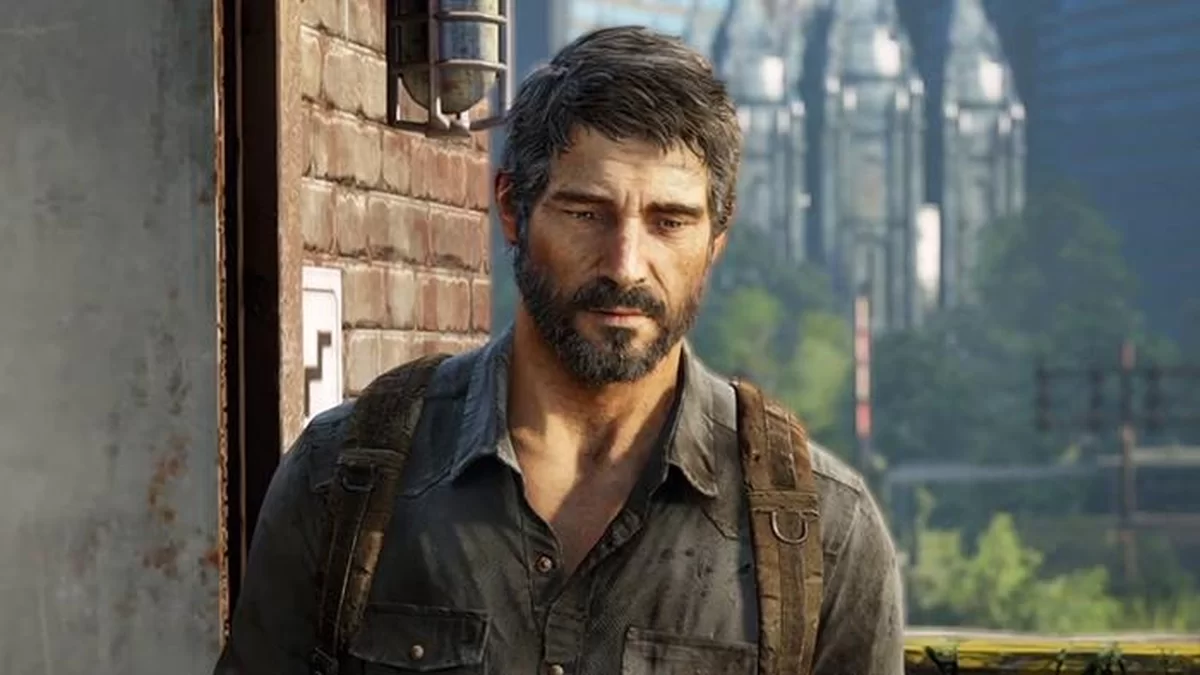

In [ ]:
character = 'Joel'

Joel world cloud

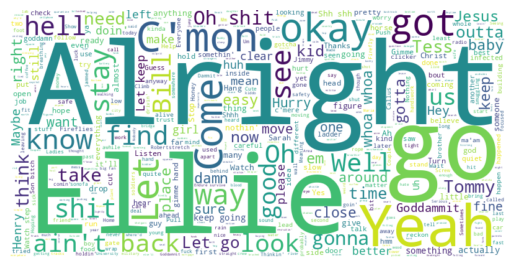

In [ ]:
generate_wordcloud(''.join(Get_character_lines(character)))

Joel: mudanças na polaridade de sentimentos em cada capítulo

In [ ]:
# Criar um DataFrame com dados de texto
df = pd.DataFrame({'Chapters': tlou1_chap_text})

df['Sentiment'] = [Get_sentiment_analisys(character, x) for x in tlou1_chap_text]

# Exibir o resultado
print(df)

                                             Chapters  Sentiment
0   01) HOMETOWN                                  ...   0.085259
1   02) THE QUARANTINE ZONE                       ...   0.159207
2   03) THE OUTSKIRTS                             ...   0.095247
3   04) BILL'S TOWN                               ...   0.174657
4   05) PITTSBURGH                                ...   0.043176
5   06) THE SUBURBS                               ...   0.213932
6   07) TOMMY'S DAM                               ...   0.162781
7   08) THE UNIVERSITY                            ...   0.067862
8   09) LAKESIDE RESORT                           ...   0.235714
9   10) BUS DEPOT                                 ...  -0.033094
10  11) THE FIREFLY LAB                           ...   0.103125
11  12) JACKSON                                   ...   0.150000


Joel: gráfico da polaridade de sentimentos

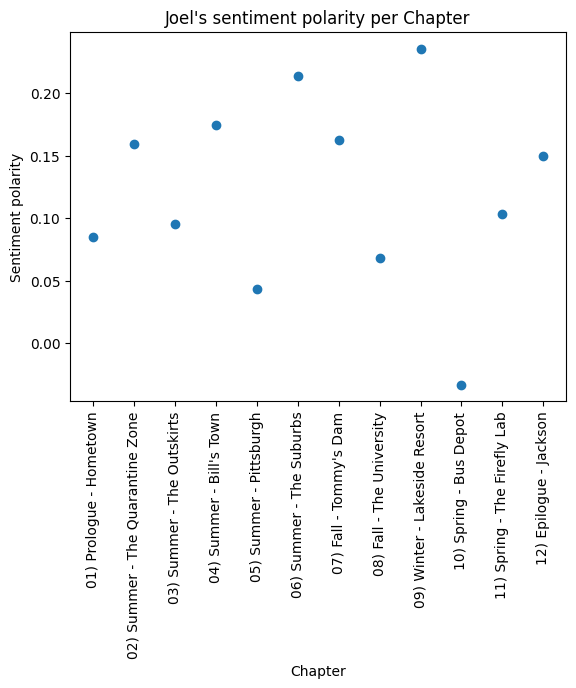

In [ ]:
# Criar o gráfico de dispersão
plt.scatter(df.index, df['Sentiment'])

# Definir o título e os rótulos dos eixos
plt.title(f"{character}'s sentiment polarity per Chapter")
plt.xlabel('Chapter')
plt.xticks(range(len(tlou1_chapters_name)) ,tlou1_chapters_name, rotation=90)
plt.ylabel('Sentiment polarity')

# Exibir o gráfico
plt.show()

Citações a Tess durante o jogo

In [ ]:
for i in range(len(tlou1_chap_text)):
  if("Tess" in tlou1_chap_text[i]): print(tlou1_chapters_name[i])

02) Summer - The Quarantine Zone
03) Summer - The Outskirts
04) Summer - Bill's Town
12) Epilogue - Jackson


Podemos observar pela nuvem de palavras uma quantidade significativa de uso do imperativo, o que aponta que Joel assume uma posição de liderança durante o jogo. Provavelmente essa postura foi adotada sobre as personagens Ellie, Bill e Tess, que são os nomes que aparecem em maior tamanho na nuvem de palavras.

É interessante notar a presença dos nomes Bill e Tess porque eles participaram de poucos capítulos do jogo.

Bill se separa da dupla logo após ajudá-los a consertar um carro e Tess morre logo no começo do jogo.

Também é interessante notar que mesmo Tess morrendo no começo do jogo seu nome ainda é citado posteriormente. O que é compreensível pois era uma personagem com grande influência em Joel, já que era seu par romântico.

---

Ao analisar o gráfico de polaridade de sentimentos de Joel, vemos que ele se apresenta positivo com exceção do capítulo 10 do jogo, mas mesmo assim se apresenta próximo do ponto neutro onde em nenhum capítulo sua polaridade passou de 0.24.

Podemos supor que esse resultado é consequência do contexto do jogo, onde os personagens vivem em um mundo pós-apocalíptico e existem muitas situações adversas de sobrevivência, desta forma os diálogos se tornam mais neutros e objetivos.

Também pode ser resultado do humor durante o jogo conter traços de sarcasmo e não conseguir ser detectado pelo algoritmo de análise de sentimentos.

O capítulo mais positivo de Joel (capítulo 09) foi focado na Ellie ajudando  o Joel a se recuperar de uma facada que levou no final do capítulo anterior. Assim sua tendência mais positiva pode ser apontada por poucas interações com palavras levemente positivas e menos palavras negativas, o que resultou no seu valor mais alto de polaridade durante o jogo.

#### Ellie

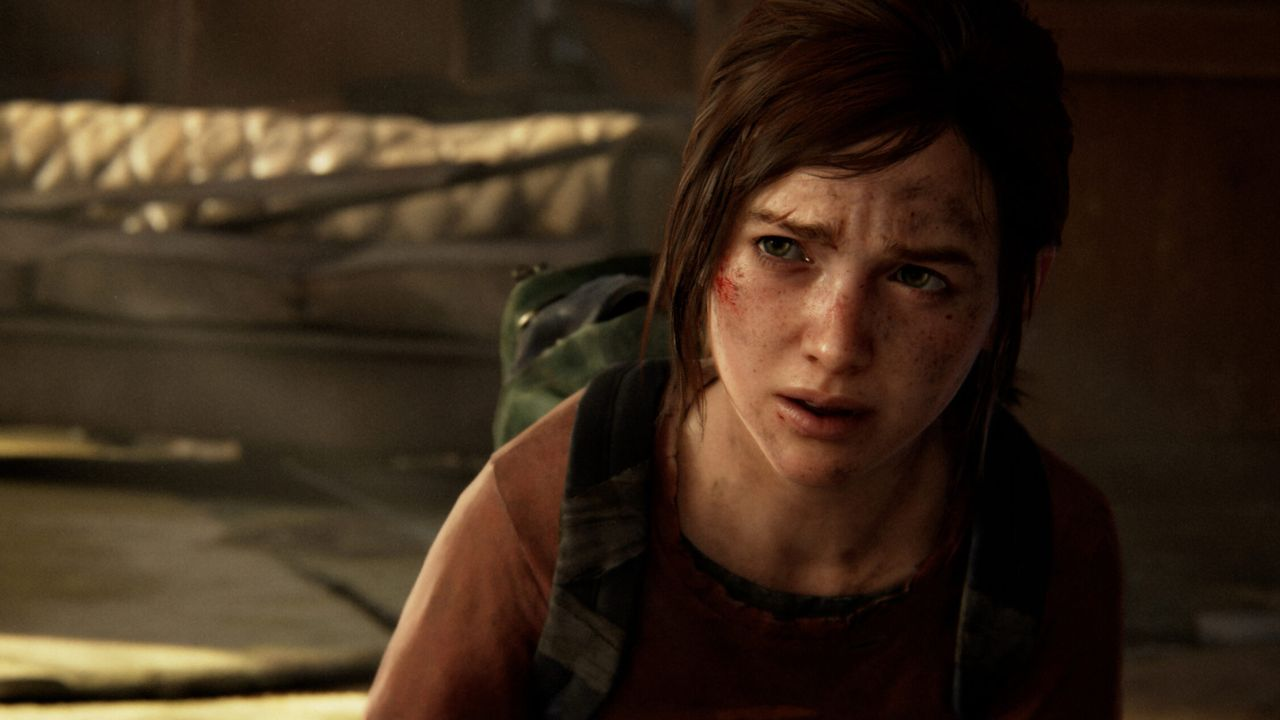

In [ ]:
character = 'Ellie'

Ellie world cloud

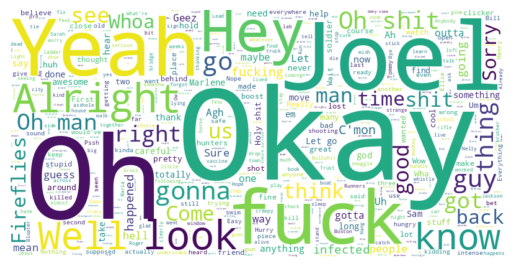

In [ ]:
generate_wordcloud(''.join(Get_character_lines(character)))

Ellie: mudanças na polaridade de sentimentos em cada capítulo

In [ ]:
# Criar um DataFrame com dados de texto
df = pd.DataFrame({'Chapters': tlou1_chap_text})

df['Sentiment'] = [Get_sentiment_analisys(character, x) for x in tlou1_chap_text]

# Exibir o resultado
print(df)

                                             Chapters  Sentiment
0   01) HOMETOWN                                  ...   0.000000
1   02) THE QUARANTINE ZONE                       ...  -0.194444
2   03) THE OUTSKIRTS                             ...   0.038062
3   04) BILL'S TOWN                               ...   0.044822
4   05) PITTSBURGH                                ...   0.057364
5   06) THE SUBURBS                               ...   0.111776
6   07) TOMMY'S DAM                               ...   0.029636
7   08) THE UNIVERSITY                            ...   0.200259
8   09) LAKESIDE RESORT                           ...  -0.017647
9   10) BUS DEPOT                                 ...   0.152943
10  11) THE FIREFLY LAB                           ...   0.000000
11  12) JACKSON                                   ...   0.500000


Ellie: gráfico da polaridade de sentimentos

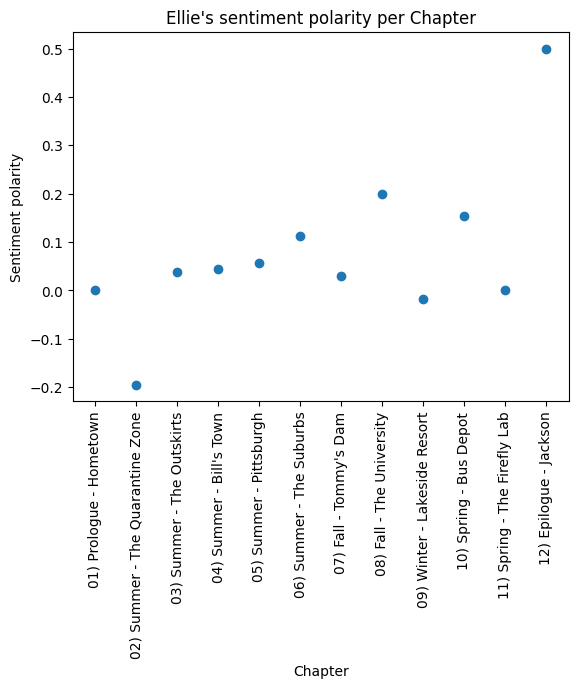

In [ ]:
# Criar o gráfico de dispersão
plt.scatter(df.index, df['Sentiment'])

# Definir o título e os rótulos dos eixos
plt.title(f"{character}'s sentiment polarity per Chapter")
plt.xlabel('Chapter')
plt.xticks(range(len(tlou1_chapters_name)) ,tlou1_chapters_name, rotation=90)
plt.ylabel('Sentiment polarity')

# Exibir o gráfico
plt.show()

Em contraste com Joel, vemos que a nuvem de palavras da Ellie possui mais tokens concordativos, o que complementa a relação hierárquica que possuem no jogo.

---
Ao observar a polaridade de sentimentos, observamos que ela possui uma tendência a neutralidade ainda maior que Joel, mas também notamos que seus picos e vales possuem maior amplitude.

O fato de Ellie apresentar maior neutralidade não foi esperado, por se tratar de uma pré-adolescente que está em uma jornada pelos Estados Unidos pela primeira vez em sua vida e também por no jogo ela aparentar ser positiva e cômica, esperava-se que sua polaridade teria um valor mais elevado.

Contudo, o fato de possuir pontos de maior amplitude é condizente com o esperado, com a sua faixa etária e com a forma como os acontecimentos nos capítulos ocorreram e a impactaram.

####David

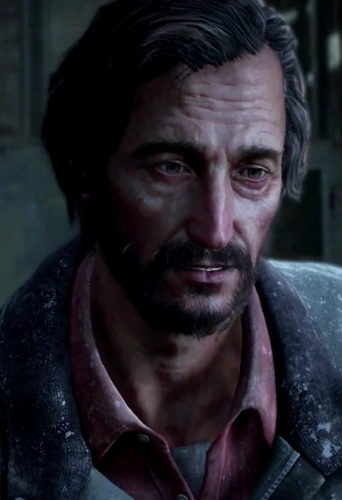

In [ ]:
character = 'David'

David world cloud

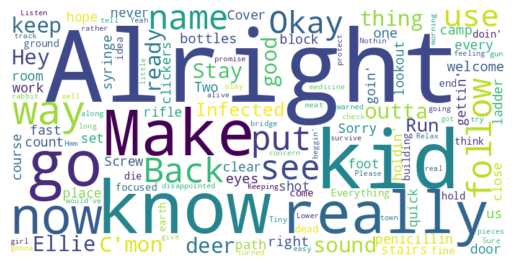

In [ ]:
generate_wordcloud(''.join(Get_character_lines(character)))

David: mudanças na polaridade de sentimentos em cada capítulo

In [ ]:
# Criar um DataFrame com dados de texto
df = pd.DataFrame({'Chapters': tlou1_chap_text})

df['Sentiment'] = [Get_sentiment_analisys(character, x) for x in tlou1_chap_text]

# Exibir o resultado
print(df)

                                             Chapters  Sentiment
0   01) HOMETOWN                                  ...   0.000000
1   02) THE QUARANTINE ZONE                       ...   0.000000
2   03) THE OUTSKIRTS                             ...   0.000000
3   04) BILL'S TOWN                               ...   0.000000
4   05) PITTSBURGH                                ...   0.000000
5   06) THE SUBURBS                               ...   0.000000
6   07) TOMMY'S DAM                               ...   0.000000
7   08) THE UNIVERSITY                            ...   0.000000
8   09) LAKESIDE RESORT                           ...   0.243473
9   10) BUS DEPOT                                 ...   0.000000
10  11) THE FIREFLY LAB                           ...   0.000000
11  12) JACKSON                                   ...   0.000000


David: gráfico da polaridade de sentimentos

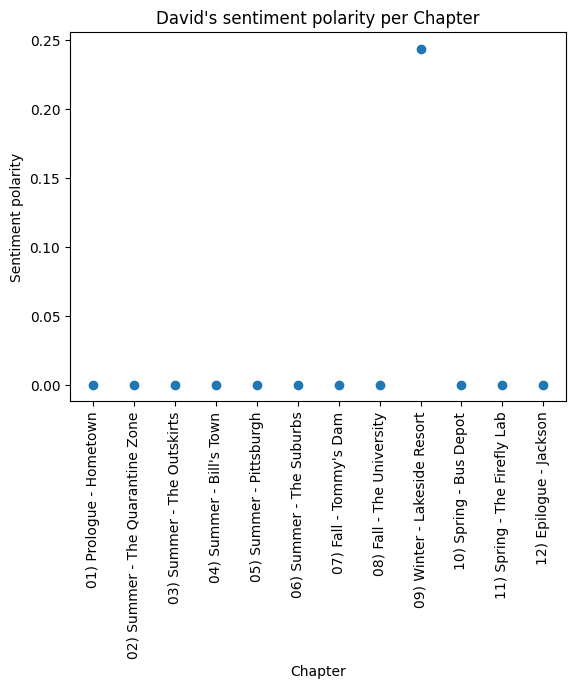

In [ ]:
# Criar o gráfico de dispersão
plt.scatter(df.index, df['Sentiment'])

# Definir o título e os rótulos dos eixos
plt.title(f"{character}'s sentiment polarity per Chapter")
plt.xlabel('Chapter')
plt.xticks(range(len(tlou1_chapters_name)) ,tlou1_chapters_name, rotation=90)
plt.ylabel('Sentiment polarity')

# Exibir o gráfico
plt.show()

Apesar de David aparecer em apenas um capítulo, é interessante avaliar sua polaridade de sentimentos porque ele é um dos grandes vilões do jogo e mesmo assim possui um valor de polaridade consideravelmente alto quando comparado com os protagonistas, o que não era de se esperar devido ao seu papel.

Isso pode ser explicado quanto consideramos o contexto do jogo. David é o líder de um grupo de sobreviventes que se caracteriza quase como um culto religioso. Ele esconde de seu grupo o fato de às vezes distribuir carne humana nos períodos onde há falta de comida. Para conseguir essa atitude ele se mostra uma pessoa manipuladora e cínica que esconde as verdadeiras intenções através de um discurso mais positivo.

É possível conectar os fatores expostos acima com a incapacidade do algoritmo de polaridade de sentimentos ser incapaz de distinguir as verdadeiras nuances de uma fala apenas pela linguagem natural.

(Como adição a esse fato, por curiosidade, perguntei ao ChatGPT-4 se ele é capaz de detectar sarcasmo em frases e obtive a seguinte resposta: "Como modelo de linguagem, sou capaz de reconhecer e produzir frases que incluem sarcasmo, mas não tenho a capacidade de detectar sarcasmo em todas as frases, pois depende do contexto e das nuances da língua. Além disso, como um programa de computador, não tenho emoções nem capacidade de entender o humor, o que pode afetar minha capacidade de interpretar sarcasmo em algumas situações.")


# Modelagem de tópicos com Top2Vec

## Download de dependências

In [ ]:
!pip install top2vec

In [ ]:
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_text-2.12.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.0 MB)


In [ ]:
!pip install tensorflow tensorflow_hub tensorflow_text

##The Last of Us part I

### Gerando modelo de tópicos Top2Vec

Essa biblioteca foi escolhida devido a sua facilidade de aplicação, pois não é preciso definir a quantidade de tópicos a serem gerados e possibilita visualizações interessantes para o output de dados.

Foram feitos testes com as bibliotecas BERTopic e Gensim, mas mesmo removendo as stop words antecipadamente essas bibliotecas criavam tópicos com palavras que não continham grande significado de aglomeração.

In [ ]:
from top2vec import Top2Vec

text = []

for chapter in tlou1_chap_text:
  text.append(chapter)

text = text *10 #multiplicado por 10 pra dar o tamanho necessário de documentos para utilizar o top2vec

tlou1_topic_model = Top2Vec(text, embedding_model="universal-sentence-encoder")

In [ ]:
tlou1_topic_model.get_num_topics()

In [ ]:
tlou1_topic_model.get_topics()

### Word cloud

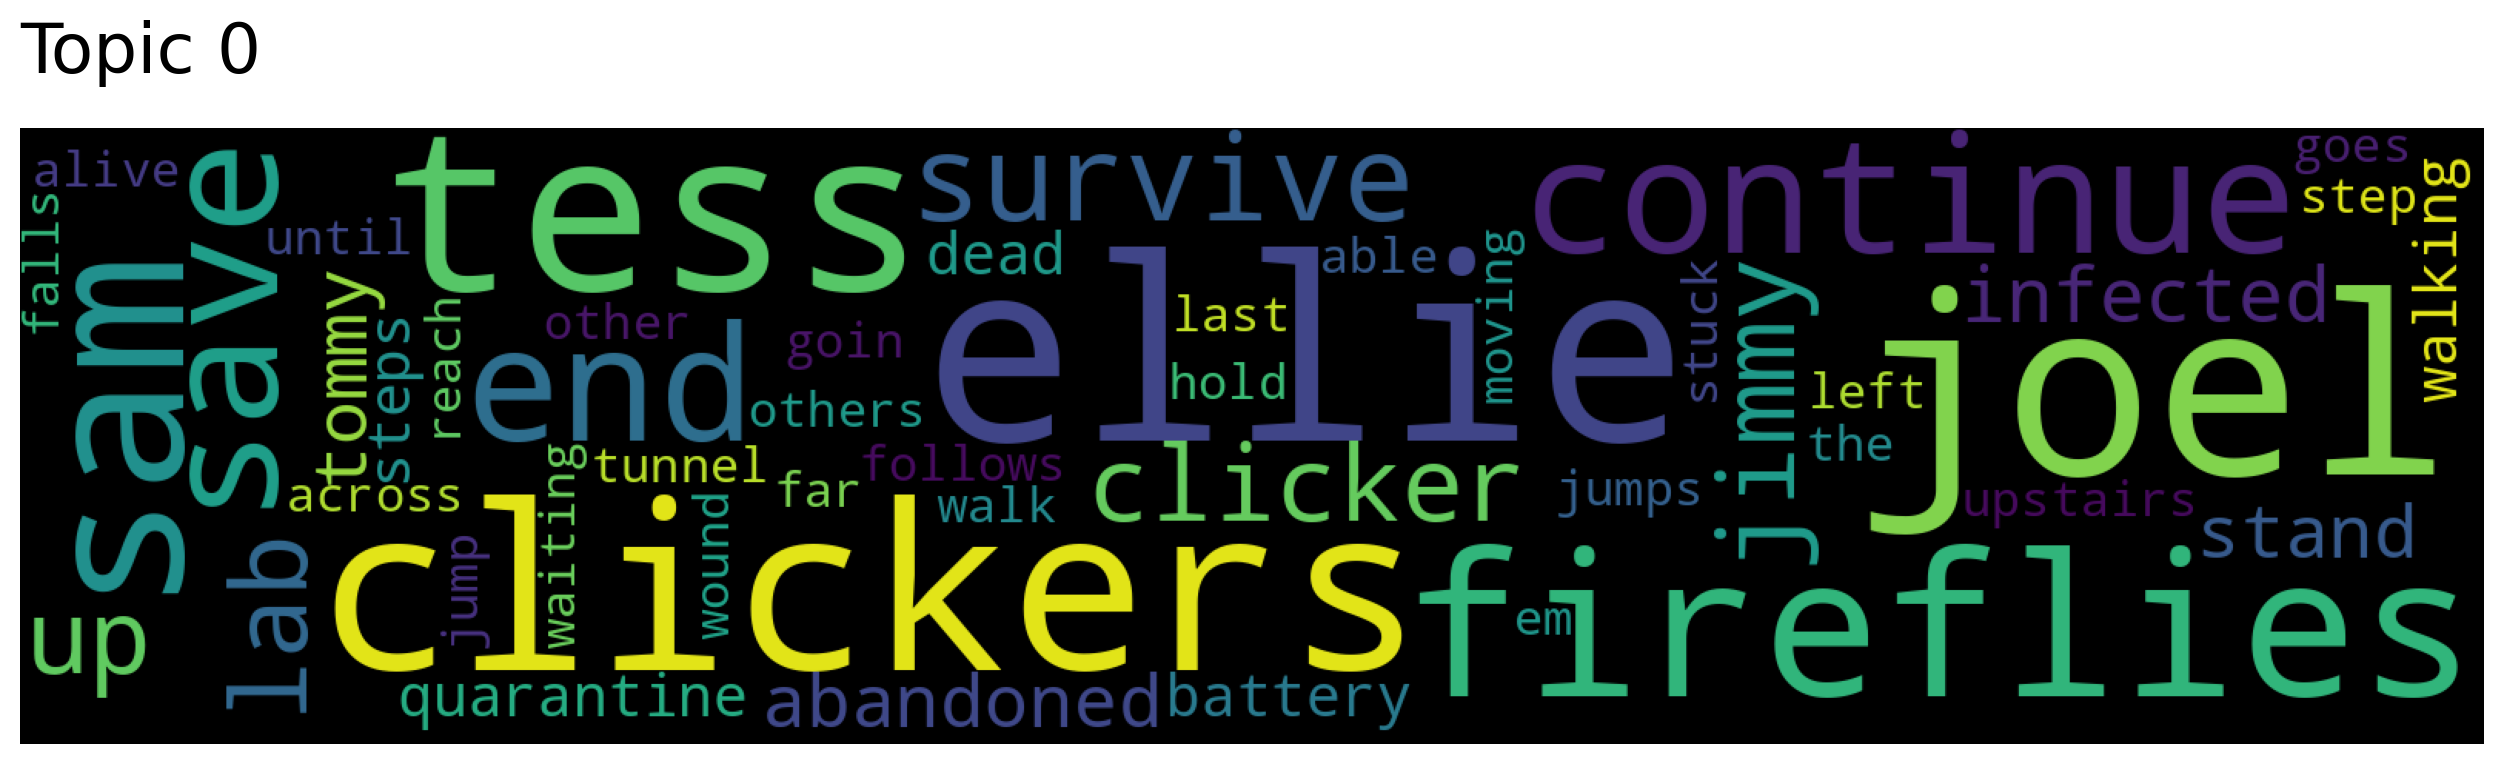

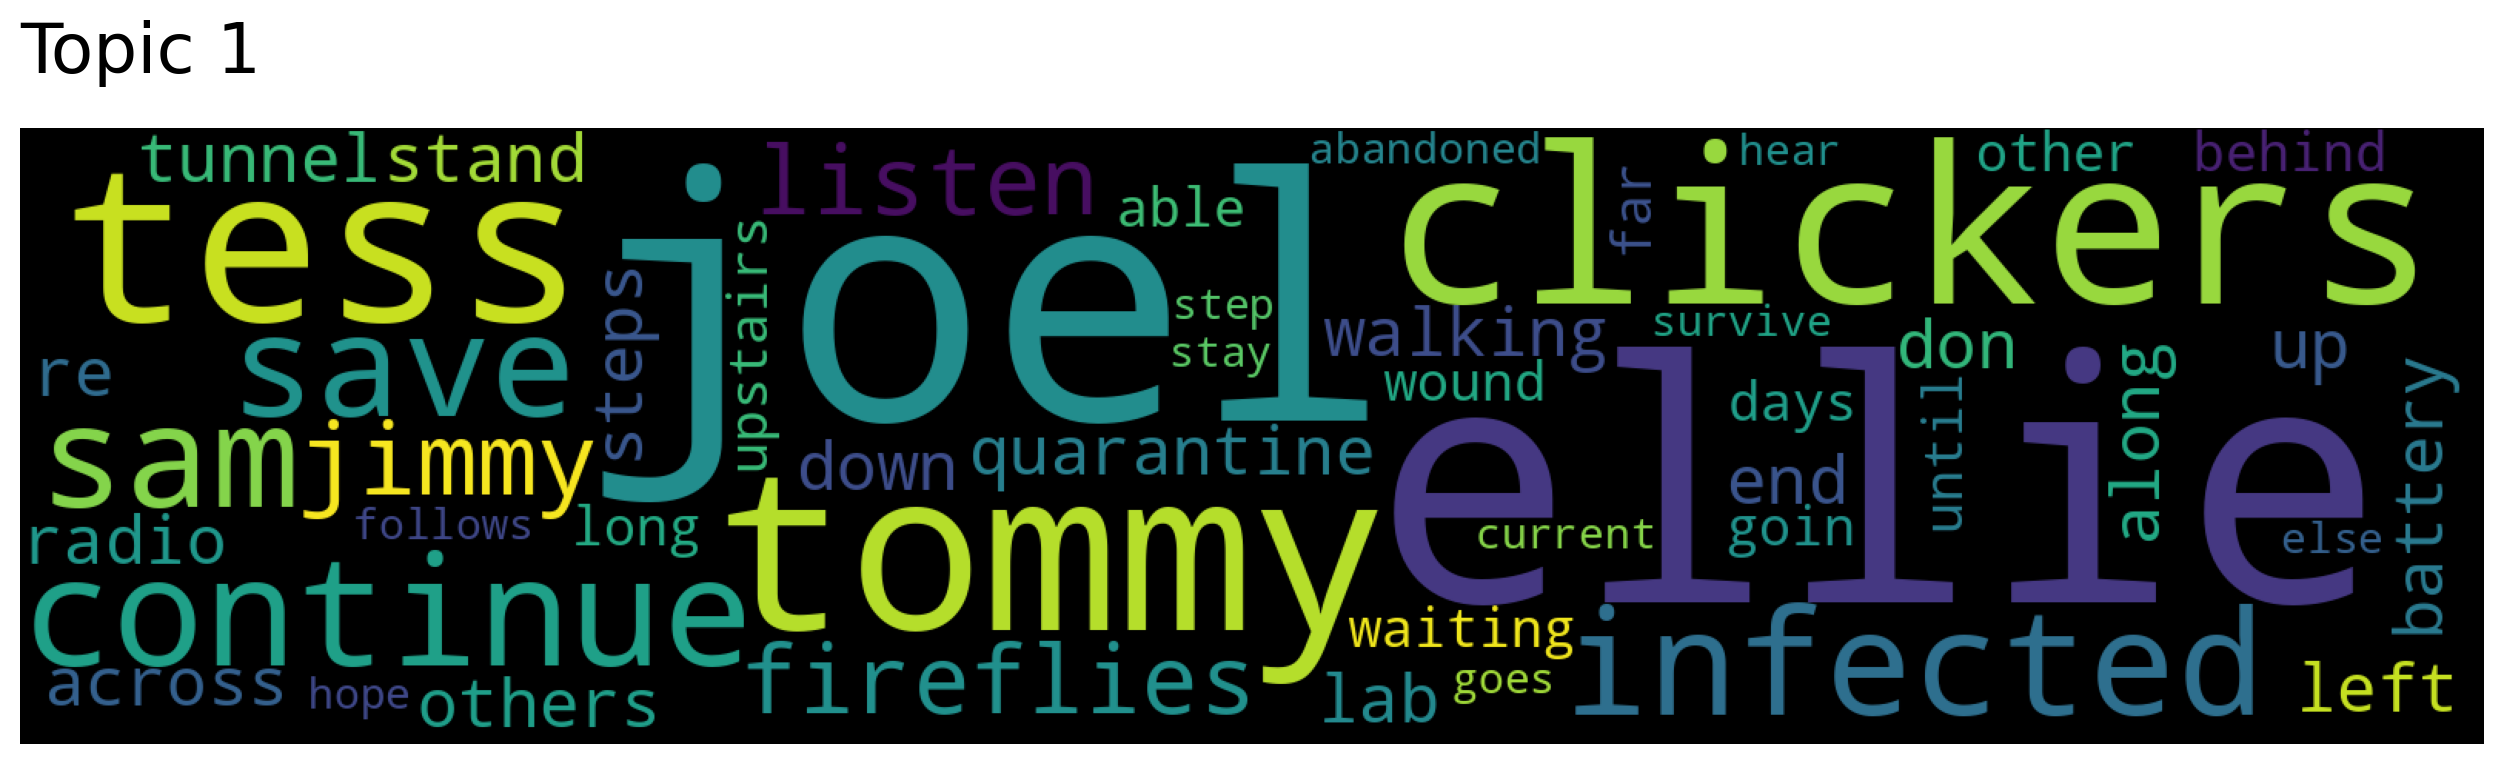

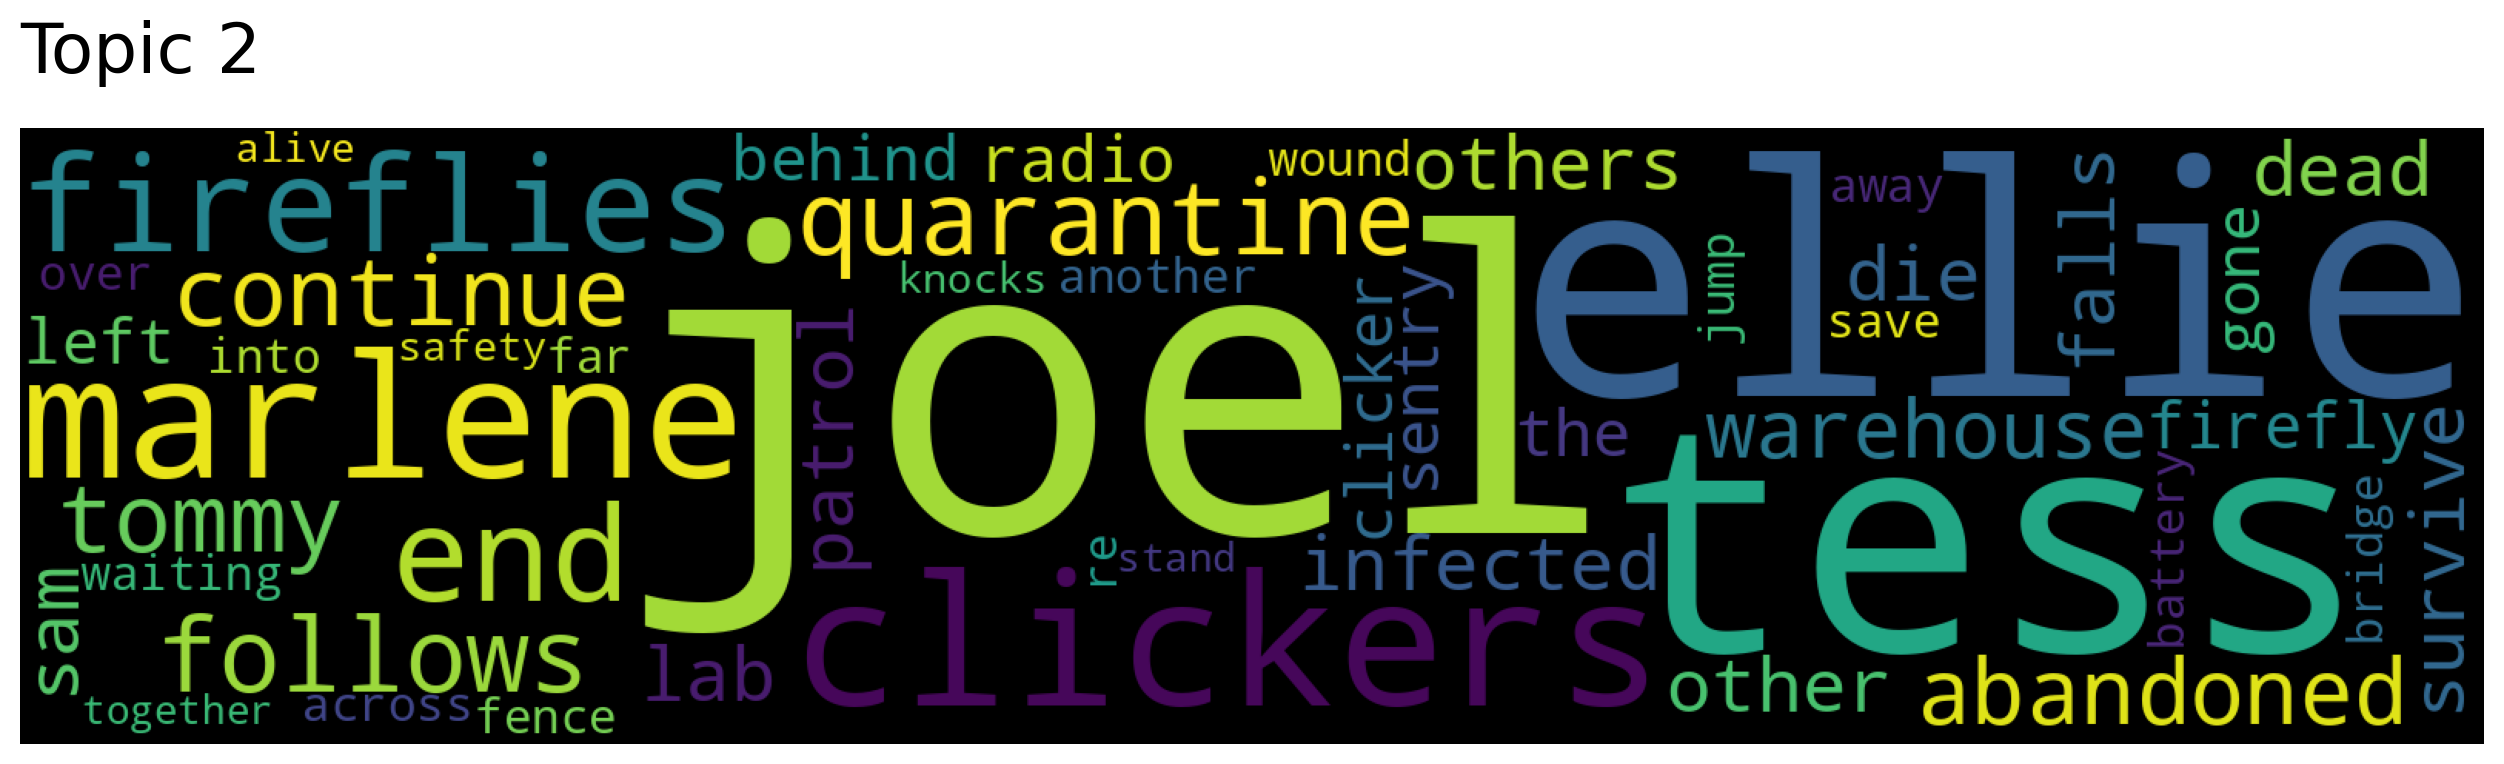

In [ ]:
topic_words, word_scores, topic_nums = tlou1_topic_model.get_topics()
for topic in topic_nums:
  tlou1_topic_model.generate_topic_wordcloud(topic)

### Score da influência na modelagem de tópicos de cada capítulo

In [ ]:
for i in range(tlou1_topic_model.get_num_topics()):
  print(f"Tópico {i}:\n")
  documents, document_scores, document_nums = tlou1_topic_model.search_documents_by_topic(topic_num=i, num_docs=tlou1_topic_model.topic_sizes[i])
  chap_tab = []
  for doc, score, doc_id in zip(documents, document_scores, document_nums):
     if(doc[:2] not in chap_tab):
       chap_tab.append(doc[:2])
       print(f"Document: {doc_id} - Chapter {doc[:2]}, Score: {score}")
       print("-----------")
       print()

Tópico 0:

Document: 103 - Chapter 08, Score: 0.9480629563331604
-----------

Document: 21 - Chapter 10, Score: 0.9410914182662964
-----------

Document: 88 - Chapter 05, Score: 0.9396114349365234
-----------

Document: 41 - Chapter 06, Score: 0.8831016421318054
-----------

Document: 111 - Chapter 04, Score: 0.8767176866531372
-----------

Document: 104 - Chapter 09, Score: 0.8174120187759399
-----------

Tópico 1:

Document: 30 - Chapter 07, Score: 0.9229198694229126
-----------

Document: 36 - Chapter 01, Score: 0.8715797662734985
-----------

Document: 95 - Chapter 12, Score: 0.8308737277984619
-----------

Tópico 2:

Document: 1 - Chapter 02, Score: 0.9303032159805298
-----------

Document: 86 - Chapter 03, Score: 0.9197610020637512
-----------

Document: 94 - Chapter 11, Score: 0.8839800357818604
-----------



Apesar de ser difícil identificar os tópicos exatos que foram gerados, podemos buscar relações entre eles a partir dos capítulos com maior influência e também em algumas palavras pontuais que foram aglomeradas.

---

No tópico 1 identificamos palavras como 'joel', 'ellie', 'tess', 'clickers', 'marlene', 'fireflies', 'quarantine' e 'survive'. Isso nos permite conectar essa tópico com maior relação às zonas de quarentena dos sobreviventes e as relações que Joel e Ellie tiveram com Tess, Marlene (líder da organização dos "Fireflies") e com os "Fireflies". Essas relações eram tratadas mais como um trabalho, que Joel e Tess prestaram a Marlene.

Essa interpretação se mostra mais condizente quando observamos que os capítulos que mais influenciaram essa aglomeração foram os capítulos 2, 3 e 11, em que há maior presença das interações entre Joel, Ellie e Tess com Marlene e os "Fireflies".

---
No tópico 2 podemos especular que ele mais influenciado pelas relações familiares e mais próximas das personagens, uma vez que possui nomes como Joel, Ellie, Sarah (filha de Joel, morta no primeiro capítulo) e Tommy (irmão de Joel). No capítulo 1 há uma apresentação da família de Joel e de como o apocalise se iniciou, tendo grande foco na tentativa de sobrevivência das personagens e no laço familiar. Já no capítulo 7 ocorre o reencontro de Joel com seu Tommy.

#Reconhecimento de Entidades Nomeadas

Objetivos:

*   Construir um grafo que represente as relações presentes nos dialogos dos personagens;
*   A partir do grafo analisar as metricas as quais podem forncer informações valiosas sobre os relacionamentos entre os personagens e sua evolução ao longo da história.



## Preparando o dataset para realizar anlise de Reconhecimento de Entidades Nomeadas

In [ ]:
!pip install requests        #for web requests
!pip install beautifulsoup4  #for web scraping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

print(len(stopwords))
print(stopwords)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(text):
  stop_words = stopwords.words('english')
  # Remove stop words
  tokens = [token for token in text.split() if token.lower() not in stop_words]
  # Join not removed words
  text_clean = ' '.join(tokens)
  return text_clean

In [ ]:
from bs4 import BeautifulSoup
import requests

#Source for TLoU 1 script: "https://gamefaqs.gamespot.com/ps3/652686-the-last-of-us/faqs/68485" Last access: 04/08/2023 MM/DD/YYYY
target_url = "https://drive.google.com/uc?id=1jYsssW5BYiNcgm_n948LtxF9skgwWMNS&export=download"
response = requests.get(target_url)
tlou1_script = response.content.decode('utf-8')
print(tlou1_script)



    _____ _   _ _____   _          ____ _____   _____ _____   _   _ ____
   |_   _| | | |  ___| | |    /¯\ |  __|_   _| |     |  ___| | | | |  __|
     | | | |_| | |_    | |   /   \| |__  | |   | (¯) | |_    | | | | |__
     | | |  _  |  _|   | |  ( (¯) )__  | | |   | | | |  _|   | | | |__  |
     | | | | | | |___  | |__|  ¯  |__| | | |   | (_) | |     | |_| |__| |
     |_| |_| |_|_____| |____|_|¯|_|____| |_|   |_____|_|     |_____|____|
 Game Script by Shotgunnova (P. Summers) / Email: shotgunnova(a+)gmail(d0t)com


   01) Prologue - Hometown ............................................. GS01
   02) Summer - The Quarantine Zone .................................... GS02
   03) Summer - The Outskirts .......................................... GS03
   04) Summer - Bill's Town ............................................ GS04
   05) Summer - Pittsburgh ............................................. GS05
   06) Summer - The Suburbs ............................................ GS06
   07) 

Obtendo os nomes dos capítulos

In [ ]:
import re
tlou1_chapters_name = []
for chap_name in re.findall("\d*\).*\s\.", tlou1_script):
  tlou1_chapters_name.append(chap_name[:len(chap_name)-2])

for i in range(2): tlou1_chapters_name.pop(-1)

print(tlou1_chapters_name)

['01) Prologue - Hometown', '02) Summer - The Quarantine Zone', '03) Summer - The Outskirts', "04) Summer - Bill's Town", '05) Summer - Pittsburgh', '06) Summer - The Suburbs', "07) Fall - Tommy's Dam", '08) Fall - The University', '09) Winter - Lakeside Resort', '10) Spring - Bus Depot', '11) Spring - The Firefly Lab', '12) Epilogue - Jackson']


In [ ]:
tlou1_chap_text = []

tmp = tlou1_script[tlou1_script.index("_______________________________________________________________________________"):]

for i in range(len(tlou1_chapters_name)):
  index = tmp.index(tlou1_chapters_name[i][:3])
  if(i == len(tlou1_chapters_name)-1):
    tlou1_chap_text.append(tmp[index:tlou1_script.index("13.")])
  else:
    tlou1_chap_text.append(tmp[index:tmp.index(tlou1_chapters_name[i+1][:3])])

print(tlou1_chap_text)

['01) HOMETOWN                                                  [PROLOGUE] [GS01]\n_______________________________________________________________________________\n¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯\n\n[Setting: Texas. Joel walks into his house late at night, on the phone.]\n\nJoel: Tommy, I-...Tommy. Tommy, listen to me. He\'s the contractor, okay? I\n      can\'t lose this job. I understand... Let\'s talk about this in the\n      morning, okay? We\'ll talk about it in the morning. Alright, goodnight.\n\n[He turns on the light, waking his daughter on the couch.]\n\nSarah: Hey.\n\nJoel: Scoot.\n\nSarah: Fun day at work, huh?\n\nJoel: What are you still doing up? It\'s late.\n\nSarah: Oh crud. What time is it?\n\nJoel: It\'s way past your bedtime.\n\nSarah: But it\'s still today.\n\nJoel: Honey, please not right now. I do not have the energy for this.\n\n[She gets out a small gift box from nearby.]\n\nSarah: Here.\n\nJoel: What\'s this?\n\nSa

Removendo descrições das cenas.

In [ ]:
# Define the regular expression pattern
pattern = r"\[.*?\]"

# Remove text between square brackets in each string of the list
clean_dialogues = [re.sub(pattern, "", d).strip() for d in tlou1_chap_text]

clean_dialogues

['01) HOMETOWN                                                   \n_______________________________________________________________________________\n¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯\n\n\n\nJoel: Tommy, I-...Tommy. Tommy, listen to me. He\'s the contractor, okay? I\n      can\'t lose this job. I understand... Let\'s talk about this in the\n      morning, okay? We\'ll talk about it in the morning. Alright, goodnight.\n\n\n\nSarah: Hey.\n\nJoel: Scoot.\n\nSarah: Fun day at work, huh?\n\nJoel: What are you still doing up? It\'s late.\n\nSarah: Oh crud. What time is it?\n\nJoel: It\'s way past your bedtime.\n\nSarah: But it\'s still today.\n\nJoel: Honey, please not right now. I do not have the energy for this.\n\n\n\nSarah: Here.\n\nJoel: What\'s this?\n\nSarah: Your birthday.\n\n\n\nSarah: You kept complaining about your broken watch... So I figured, you know.\n       You like it?\n\nJoel: Honey, this is...\n\nSarah: What?\n\nJoel: It\'s nice,

Obtendo lista de personagens

In [ ]:
tlou1_characters = []

for character in re.findall("\n\n.*:", tlou1_script):
  if(character[2:character.index(":")] not in tlou1_characters):
    tlou1_characters.append(character[2:character.index(":")])

tlou1_characters.pop(-1)

print(tlou1_characters)
print(len(tlou1_characters))

['[Setting', 'Joel', 'Sarah', 'Tommy', 'Reporter', 'Cop', 'Passerby', 'Motorist', 'Soldier', 'Clip', 'Tess', 'Loudspeaker', 'Man', 'Woman', 'Guard', 'Guard 2', 'Infected', '[If Joel puts him out of his misery', '[If Joel leaves him be', 'System', 'Terence', 'Malick', 'Goon', 'Goon 2', 'Goon 3', 'Sentry', 'Sentry 2', 'Sentry 3', 'Sentry 4', 'Robert', 'Voice', 'Marlene', 'Voice 2', 'Voice 1', 'Girl', 'Ellie', 'Patrol', 'Patrol 2', 'Soldier 2', 'Radio', 'Bill', 'Hunter', 'Hunter 2', 'Hunter 3', 'Hunter 4', 'Hunter 3 ', 'Hunter 5', 'Dying Woman', 'Kid', 'Henry', 'Sam', 'Maria', 'Earl', 'Man 2', 'Man 3', 'Man 4', '[They find the source of the noise', 'David', 'James', 'Hunter 6', 'Hunter 7', 'Hunter 8', 'Hunter 9', 'Hunter 10', 'Female Hunter', "[He sees what's got her so wide-eyed", 'Firefly', 'Firefly 2', 'Firefly 3', 'Nurse', 'Doctor', 'Doctor 2', 'Firefly 4', 'Firefly 5', 'Firefly 6', 'Firefly 7', 'Firefly 8', 'Firefly 9']
78


Preparando e alocando os dados em um dataframe para realizar a analise NER

In [ ]:
import pandas as pd

data = []

# Iterate over the list of dialogue strings
for dialogue in clean_dialogues:
    # Split the dialogue string into separate lines
    lines = dialogue.split('\n')
    # Get the chapter number and name from the first line
    chapter = lines[0].split(') ')[1]
    # Keep track of the current character and dialogue text
    current_character = None
    current_dialogue = ''
    # Process each line of the dialogue
    for line in lines[3:]:
        # If the line contains a character name, store the current dialogue and start a new one
        if ':' in line:
            # If there was already a character being processed, append the dialogue to the data list
            if current_character is not None:
                data.append([chapter, current_character, current_dialogue.strip()])
            # Start processing the new character and dialogue
            current_character = line.split(':')[0]
            current_dialogue = line.split(':')[1].strip()
        # If the line does not contain a character name, append it to the current dialogue
        else:
            current_dialogue += ' ' + line.strip()
    # Append the final dialogue for the last character in the chapter
    if current_character is not None:
        data.append([chapter, current_character, current_dialogue.strip()])

# Create a Pandas DataFrame from the list of data
df = pd.DataFrame(data, columns=['Chapter', 'Character', 'Dialogue'])

In [ ]:
#Deletando a ultima linha (não há entidades relevantes e contém lixo que pode atrapalhar a analise)
df = df.drop(df.index[-1])

#Removendo espaço extra dos nomes dos capitulos
df['Chapter'] = df['Chapter'].apply(lambda x: x.strip())

df

Chapter Character                                           Dialogue
0     HOMETOWN      Joel  Tommy, I-...Tommy. Tommy, listen to me. He's t...
1     HOMETOWN     Sarah                                               Hey.
2     HOMETOWN      Joel                                             Scoot.
3     HOMETOWN     Sarah                              Fun day at work, huh?
4     HOMETOWN      Joel            What are you still doing up? It's late.
...        ...       ...                                                ...
3410   JACKSON      Joel                            None of that is on you.
3411   JACKSON     Ellie                          No, you don't understand.
3412   JACKSON      Joel  I struggled for a long time with survivin'. An...
3413   JACKSON     Ellie  Swear to me. Swear to me that everything you s...
3414   JACKSON      Joel                                           I swear.

[3415 rows x 3 columns]

Contando o número de dialogos por capitulos

In [ ]:
# Group the DataFrame by chapters and count the number of dialogues per chapter
dialogues_per_chapter = df.groupby('Chapter')['Dialogue'].count()
print(dialogues_per_chapter)

Chapter
BILL'S TOWN            504
BUS DEPOT              114
HOMETOWN               190
JACKSON                 18
LAKESIDE RESORT        265
PITTSBURGH             580
THE FIREFLY LAB         78
THE OUTSKIRTS          408
THE QUARANTINE ZONE    406
THE SUBURBS            338
THE UNIVERSITY         185
TOMMY'S DAM            329
Name: Dialogue, dtype: int64


Testando a filtragem do dataframe por capitulo

In [ ]:
# Filter the dataframe by chapter
hometown_df = df[df['Chapter'] == 'HOMETOWN']
hometown_df

Chapter Character                                           Dialogue
0    HOMETOWN      Joel  Tommy, I-...Tommy. Tommy, listen to me. He's t...
1    HOMETOWN     Sarah                                               Hey.
2    HOMETOWN      Joel                                             Scoot.
3    HOMETOWN     Sarah                              Fun day at work, huh?
4    HOMETOWN      Joel            What are you still doing up? It's late.
..        ...       ...                                                ...
185  HOMETOWN     Tommy                                          Oh, no...
186  HOMETOWN      Joel                Sarah! Okay. Move your hands, baby.
187  HOMETOWN      Joel                            I know, baby. I know...
188  HOMETOWN      Joel  Listen to me, I know this hurts, baby. You're ...
189  HOMETOWN      Joel  Sarah... Baby... Don't do this to me, baby. Do...

[190 rows x 3 columns]

#Aplicando técnicas NER

Baixando e importando o modelo Spacy transformer

In [ ]:
!python -m spacy download en_core_web_trf

2023-05-01 01:02:28.610223: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
import spacy
import spacy_transformers

nlp = spacy.load("en_core_web_trf")

In [ ]:
def extract_named_entities_from_character(df, character, chapter, types_entities):
    # Filtra o DataFrame pelas falas do personagem especificado no episódio especificado
    filtered_df = df[(df['Chapter'] == chapter) & (df['Character'] == character)]

    # Extrai as falas do personagem
    transcripts = filtered_df['Dialogue'].tolist()

    # Processa as falas com o modelo de linguagem do spaCy
    docs = [nlp(transcript) for transcript in transcripts]

    # Itera pelas entidades nomeadas e retorna um dicionário com as entidades e seus tipos
    named_entities = {}
    for doc in docs:
      for entity in doc.ents:
        if entity.label_ in types_entities:
            if entity.text not in named_entities:
                named_entities[entity.text] = set([entity.label_])
            else:
                named_entities[entity.text].add(entity.label_)

    return named_entities

In [ ]:
extract_named_entities_from_character(df, 'Sarah', 'HOMETOWN', ['PERSON'])

{'Tommy': {'PERSON'}, 'Jimmy': {'PERSON'}}

A função abaixo inpirada no exemplo do professor, filtra os dados do dataframe por capitulo, personagem e tipo de entidades que se deseja reconhecer. Além de criar e devolver um novo dataframe contendo como colunas: Char_1, index, Char_2, Labels; O qual será usado para realizar analises mais especificas com a técnica NER.

In [ ]:
import pandas as pd

def extract_named_entities_from_character(df, character, chapter, types_entities):
    # Filtra o DataFrame pelas falas do personagem especificado no episódio especificado
    filtered_df = df[(df['Chapter'] == chapter) & (df['Character'] == character)]

    # Extrai as falas do personagem
    transcripts = filtered_df['Dialogue'].tolist()

    # Processa as falas com o modelo de linguagem do spaCy
    docs = [nlp(transcript) for transcript in transcripts]

    # Itera pelas entidades nomeadas e retorna um dicionário com as entidades e seus tipos
    named_entities = {}
    for idx, doc in enumerate(docs):
        for entity in doc.ents:
            if entity.label_ in types_entities:
                if entity.text not in named_entities:
                    named_entities[entity.text] = set([entity.label_])
                else:
                    named_entities[entity.text].add(entity.label_)

    # Cria o dataframe a partir do dicionário de entidades
    df_entities = pd.DataFrame(named_entities.items(), columns=['Char_2', 'Labels'])
    df_entities['Char_1'] = character
    df_entities['index'] = df_entities.index

    # Reordena as colunas do dataframe
    df_entities = df_entities[['Char_1', 'index', 'Char_2', 'Labels']]

    return df_entities


Nesta chamada por exemplo, foi realizada o reconhecimento de todas as entidades do tipo PERSON presentes nos dialogos do personagem Joel no capitulo HOMETOWN

In [ ]:
extract_named_entities_from_character(df, 'Joel', 'HOMETOWN', ['PERSON'])

Char_1  index        Char_2    Labels
0   Joel      0         Tommy  {PERSON}
1   Joel      1         Sarah  {PERSON}
2   Joel      2       Coopers  {PERSON}
3   Joel      3         Jesus  {PERSON}
4   Joel      4         Jimmy  {PERSON}
5   Joel      5  Jesus Christ  {PERSON}
6   Joel      6         Louis  {PERSON}
7   Joel      7           God  {PERSON}

In [ ]:
extract_named_entities_from_character(df, 'Tommy', 'HOMETOWN', ['PERSON'])

Char_1  index Char_2    Labels
0  Tommy      0  Sarah  {PERSON}
1  Tommy      1   Joel  {PERSON}

In [ ]:
extract_named_entities_from_character(df, 'Sarah', 'HOMETOWN', ['PERSON'])

Char_1  index Char_2    Labels
0  Sarah      0  Tommy  {PERSON}
1  Sarah      1  Jimmy  {PERSON}

In [ ]:
extract_named_entities_from_character(df, 'Reporter', 'HOMETOWN', ['PERSON'])

Empty DataFrame
Columns: [Char_1, index, Char_2, Labels]
Index: []

In [ ]:
# Função que retorna um array contendo todos os personagens que tem dialogos no capítulo especificado
def get_characters_by_chapter(df, chapter):
    return df[df['Chapter'] == chapter]['Character'].unique()

charByChapter1 = get_characters_by_chapter(df, 'HOMETOWN')
charByChapter1

array(['Joel', 'Sarah', 'Tommy', 'Reporter', 'Cop', 'Passerby',
       'Motorist', 'Soldier'], dtype=object)

A função getCharacterRelationsByChapter recebe como paramêtros o capítulo e a lista de personagens daquele capítulo e retorna um dataframe contendo as relações entre os personagens daquele capitulo por meio da função extract_named_entities_from_character

In [ ]:
def getCharacterRelationsByChapter(df, chapter, charArray):
    dfs = []
    for character in charArray:
        dfs.append(extract_named_entities_from_character(df, character, chapter, ['PERSON']))
    return pd.concat(dfs, ignore_index=True)

dfRelations = getCharacterRelationsByChapter(df, 'HOMETOWN', charByChapter1)
dfRelations

Char_1 index        Char_2    Labels
0    Joel     0         Tommy  {PERSON}
1    Joel     1         Sarah  {PERSON}
2    Joel     2       Coopers  {PERSON}
3    Joel     3         Jesus  {PERSON}
4    Joel     4         Jimmy  {PERSON}
5    Joel     5  Jesus Christ  {PERSON}
6    Joel     6         Louis  {PERSON}
7    Joel     7           God  {PERSON}
8   Sarah     0         Tommy  {PERSON}
9   Sarah     1         Jimmy  {PERSON}
10  Tommy     0         Sarah  {PERSON}
11  Tommy     1          Joel  {PERSON}

Na celula abaixo é realizada a limpeza do dataframe, onde foi necessário remover algumas entidades que foram reconhecidas equivocadamente como PERSON apesar de se tratarem de exclamações

In [ ]:
# dfRelations = dfRelations[~(dfRelations['Char_2'] == 'Jesus')]
dfRelations = dfRelations[~dfRelations['Char_2'].isin(['Jesus', 'God', 'Jesus Christ'])]
# dfRelations = dfRelations.drop(dfRelations[dfRelations.Char_2 == 'Jesus'].index)
dfRelations

Char_1 index   Char_2    Labels
0    Joel     0    Tommy  {PERSON}
1    Joel     1    Sarah  {PERSON}
2    Joel     2  Coopers  {PERSON}
4    Joel     4    Jimmy  {PERSON}
6    Joel     6    Louis  {PERSON}
8   Sarah     0    Tommy  {PERSON}
9   Sarah     1    Jimmy  {PERSON}
10  Tommy     0    Sarah  {PERSON}
11  Tommy     1     Joel  {PERSON}

Depois de coletar os dados, construir o dataframe e fazer as filtragens e limpezas necessárias, podemos finalmente criar um grafo utilizando a biblioteca NetworkX. Cada vértice do grafo representa um personagem presente no capítulo correspondente do dataframe e as arestas representam as relações entre eles, obtidas através do Reconhecimento de Entidades Nomeadas do tipo PERSON presentes nos diálogos desse capítulo. Essa abordagem nos permite analisar as relações entre os personagens e como elas mudam ao longo do tempo.

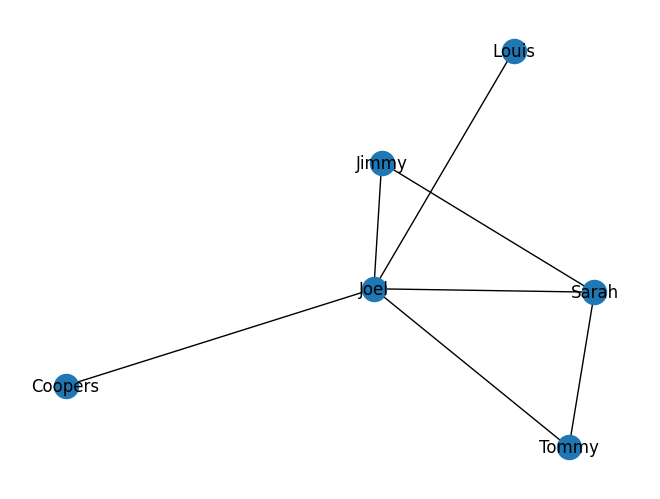

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Adicionando nós no gráfico usando Char_1 e Char_2
for node in set(dfRelations['Char_1']).union(set(dfRelations['Char_2'])):
    G.add_node(node)

# Adicione arestas ao gráfico
for idx, row in dfRelations.iterrows():
    G.add_edge(row['Char_1'], row['Char_2'])

nx.draw(G, with_labels=True)
plt.show()


Gerar um gráfico e analisar métricas de grau de centralidade e intermediação é uma forma eficaz de estudar as relações entre personagens e como elas mudam com o tempo. O grau de centralidade mede as conexões diretas entre personagens, enquanto a centralidade de intermediação mede o papel de um personagem como mediador ou intermediário. Essas métricas permitem visualizar a rede de relacionamentos entre personagens e identificar personagens-chave e seus papéis na narrativa. A análise dessas métricas pode fornecer informações valiosas sobre os relacionamentos entre os personagens e sua evolução ao longo da história.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Grau de Centralidade
deg_centrality = nx.degree_centrality(G)
sorted_deg_centrality = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
print("Grau de Centralidade:")
print(sorted_deg_centrality)

# grau de centralidade por intermediação (betweenness)
bet_centrality = nx.betweenness_centrality(G)
sorted_bet_centrality = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)
print("Betweenness:")
print(sorted_bet_centrality)


Grau de Centralidade:
[('Joel', 1.0), ('Sarah', 0.6000000000000001), ('Jimmy', 0.4), ('Tommy', 0.4), ('Louis', 0.2), ('Coopers', 0.2)]
Betweenness:
[('Joel', 0.75), ('Sarah', 0.05), ('Jimmy', 0.0), ('Tommy', 0.0), ('Louis', 0.0), ('Coopers', 0.0)]


# Analise final por meio do NER

Irei escolher dois capitulos (com o maior numero de entidades dentre os capítulos), e aplicar as técnicas NER apresentadas previamente para realizar a analise de como a relação entre os personagens e como ela muda com o passar do tempo.

In [ ]:
# Coletando personagens que tem dialogos no capítulo 2
charByChapter2 = get_characters_by_chapter(df, "THE QUARANTINE ZONE") #Capítulo 2
charByChapter2

array(['Clip', 'Joel', 'Tess', 'Loudspeaker', 'Man', 'Woman', 'Guard',
       'Guard 2', 'Infected', 'System', 'Terence', 'Malick', 'Goon',
       'Goon 2', 'Goon 3', 'Sentry', 'Sentry 2', 'Sentry 3', 'Sentry 4',
       'Robert', 'Voice', 'Marlene', 'Voice 2', 'Voice 1', 'Girl',
       'Ellie'], dtype=object)

In [ ]:
extract_named_entities_from_character(df, 'Joel', 'THE QUARANTINE ZONE', ['PERSON'])

Char_1  index        Char_2    Labels
0   Joel      0          Tess  {PERSON}
1   Joel      1   Our Robert?  {PERSON}
2   Joel      2     Fireflies  {PERSON}
3   Joel      3         Jesus  {PERSON}
4   Joel      4          Bill  {PERSON}
5   Joel      5        Robert  {PERSON}
6   Joel      6  Jesus Christ  {PERSON}
7   Joel      7       Marlene  {PERSON}

In [ ]:
# Gerando dataframe com relações entre os personagens do capitulo 2
dfRelations2 = getCharacterRelationsByChapter(df, 'THE QUARANTINE ZONE', charByChapter2)
dfRelations2

Char_1 index        Char_2    Labels
0       Joel     0          Tess  {PERSON}
1       Joel     1   Our Robert?  {PERSON}
2       Joel     2     Fireflies  {PERSON}
3       Joel     3         Jesus  {PERSON}
4       Joel     4          Bill  {PERSON}
5       Joel     5        Robert  {PERSON}
6       Joel     6  Jesus Christ  {PERSON}
7       Joel     7       Marlene  {PERSON}
8       Tess     0        Robert  {PERSON}
9       Tess     1          Joel  {PERSON}
10      Tess     2       Marlene  {PERSON}
11      Tess     3          Bill  {PERSON}
12      Tess     4         Plank  {PERSON}
13      Tess     5       Terence  {PERSON}
14      Tess     6        Malick  {PERSON}
15      Tess     7         Ellie  {PERSON}
16       Man     0          Joel  {PERSON}
17       Man     1      Marianne  {PERSON}
18       Man     2          Tess  {PERSON}
19       Man     3       Marlene  {PERSON}
20     Guard     0        Robert  {PERSON}
21    System     0          Joel  {PERSON}
22    Malick     0          Tess  {PERSON}
23    Sentry     0         Jesus  {PERSON}
24    Sentry     1        Robert  {PERSON}
25  Sentry 2     0          Tess  {PERSON}
26  Sentry 2     1          Joel  {PERSON}
27  Sentry 2     2        Robert  {PERSON}
28    Robert     0          Joel  {PERSON}
29    Robert     1          Tess  {PERSON}
30   Marlene     0        Robert  {PERSON}
31   Marlene     1          Tess  {PERSON}
32   Marlene     2          Joel  {PERSON}
33   Marlene     3         Ellie  {PERSON}
34   Marlene     4         Tommy  {PERSON}
35     Ellie     0       Marlene  {PERSON}

In [ ]:
# Limpando dataframe
dfRelations2 = dfRelations2[~dfRelations2['Char_2'].isin(['Jesus', 'God', 'Jesus Christ', 'Our Robert?', 'Fireflies'])]
dfRelations2

Char_1 index    Char_2    Labels
0       Joel     0      Tess  {PERSON}
4       Joel     4      Bill  {PERSON}
5       Joel     5    Robert  {PERSON}
7       Joel     7   Marlene  {PERSON}
8       Tess     0    Robert  {PERSON}
9       Tess     1      Joel  {PERSON}
10      Tess     2   Marlene  {PERSON}
11      Tess     3      Bill  {PERSON}
12      Tess     4     Plank  {PERSON}
13      Tess     5   Terence  {PERSON}
14      Tess     6    Malick  {PERSON}
15      Tess     7     Ellie  {PERSON}
16       Man     0      Joel  {PERSON}
17       Man     1  Marianne  {PERSON}
18       Man     2      Tess  {PERSON}
19       Man     3   Marlene  {PERSON}
20     Guard     0    Robert  {PERSON}
21    System     0      Joel  {PERSON}
22    Malick     0      Tess  {PERSON}
24    Sentry     1    Robert  {PERSON}
25  Sentry 2     0      Tess  {PERSON}
26  Sentry 2     1      Joel  {PERSON}
27  Sentry 2     2    Robert  {PERSON}
28    Robert     0      Joel  {PERSON}
29    Robert     1      Tess  {PERSON}
30   Marlene     0    Robert  {PERSON}
31   Marlene     1      Tess  {PERSON}
32   Marlene     2      Joel  {PERSON}
33   Marlene     3     Ellie  {PERSON}
34   Marlene     4     Tommy  {PERSON}
35     Ellie     0   Marlene  {PERSON}

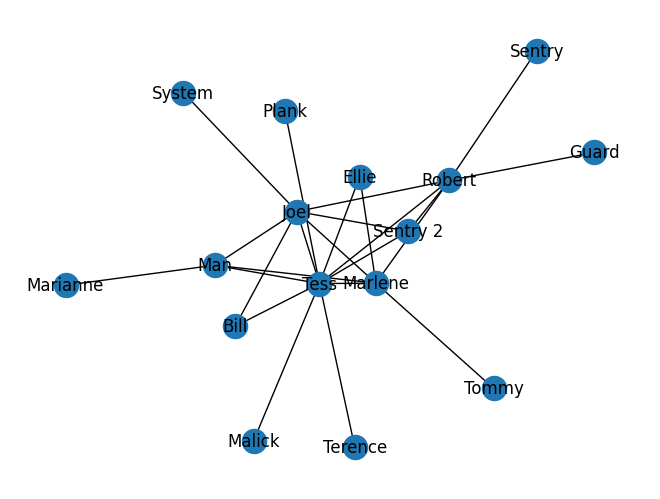

In [ ]:
# Gerando grafo das relações entre os personagens do capítulo 2
import networkx as nx
import matplotlib.pyplot as plt

G2 = nx.Graph()

# Adicionando nós no gráfico usando Char_1 e Char_2
for node in set(dfRelations2['Char_1']).union(set(dfRelations2['Char_2'])):
    G2.add_node(node)

# Adicionando arestas ao gráfico
for idx, row in dfRelations2.iterrows():
    G2.add_edge(row['Char_1'], row['Char_2'])

nx.draw(G2, with_labels=True)
plt.show()


In [ ]:
# Coletando personagens que tem dialogos no capítulo 4
charByChapter3 = get_characters_by_chapter(df, "BILL'S TOWN") #Capítulo 4
charByChapter3

array(['Joel', 'Ellie', 'Bill', 'Tess', '      thing'], dtype=object)

In [ ]:
extract_named_entities_from_character(df, 'Joel', "BILL'S TOWN", ['PERSON'])

Char_1  index Char_2    Labels
0   Joel      0   Bill  {PERSON}
1   Joel      1  Tommy  {PERSON}
2   Joel      2  Jesus  {PERSON}
3   Joel      3  Ellie  {PERSON}
4   Joel      4   Tess  {PERSON}
5   Joel      5  Frank  {PERSON}

In [ ]:
# Gerando dataframe com relações entre os personagens do capitulo 4
dfRelations3 = getCharacterRelationsByChapter(df, "BILL'S TOWN", charByChapter3)
dfRelations3

Char_1 index         Char_2    Labels
0    Joel     0           Bill  {PERSON}
1    Joel     1          Tommy  {PERSON}
2    Joel     2          Jesus  {PERSON}
3    Joel     3          Ellie  {PERSON}
4    Joel     4           Tess  {PERSON}
5    Joel     5          Frank  {PERSON}
6   Ellie     0        Marlene  {PERSON}
7   Ellie     1   Angel Knives  {PERSON}
8   Ellie     2          Nelly  {PERSON}
9   Ellie     3           Bill  {PERSON}
10  Ellie     4           Joel  {PERSON}
11  Ellie     5          Ellie  {PERSON}
12  Ellie     6          Bobby  {PERSON}
13  Ellie     7           Tess  {PERSON}
14  Ellie     8        Bloater  {PERSON}
15   Bill     0           Joel  {PERSON}
16   Bill     1  Bobby Fischer  {PERSON}
17   Bill     2           Bill  {PERSON}
18   Bill     3           Tess  {PERSON}
19   Bill     4          Frank  {PERSON}
20   Bill     5          Jesus  {PERSON}

In [ ]:
# Limpando dataframe
dfRelations3 = dfRelations3[~dfRelations3['Char_2'].isin(['Jesus', 'God', 'Jesus Christ', 'Our Robert?', 'Fireflies'])]
dfRelations3

Char_1 index         Char_2    Labels
0    Joel     0           Bill  {PERSON}
1    Joel     1          Tommy  {PERSON}
3    Joel     3          Ellie  {PERSON}
4    Joel     4           Tess  {PERSON}
5    Joel     5          Frank  {PERSON}
6   Ellie     0        Marlene  {PERSON}
7   Ellie     1   Angel Knives  {PERSON}
8   Ellie     2          Nelly  {PERSON}
9   Ellie     3           Bill  {PERSON}
10  Ellie     4           Joel  {PERSON}
11  Ellie     5          Ellie  {PERSON}
12  Ellie     6          Bobby  {PERSON}
13  Ellie     7           Tess  {PERSON}
14  Ellie     8        Bloater  {PERSON}
15   Bill     0           Joel  {PERSON}
16   Bill     1  Bobby Fischer  {PERSON}
17   Bill     2           Bill  {PERSON}
18   Bill     3           Tess  {PERSON}
19   Bill     4          Frank  {PERSON}

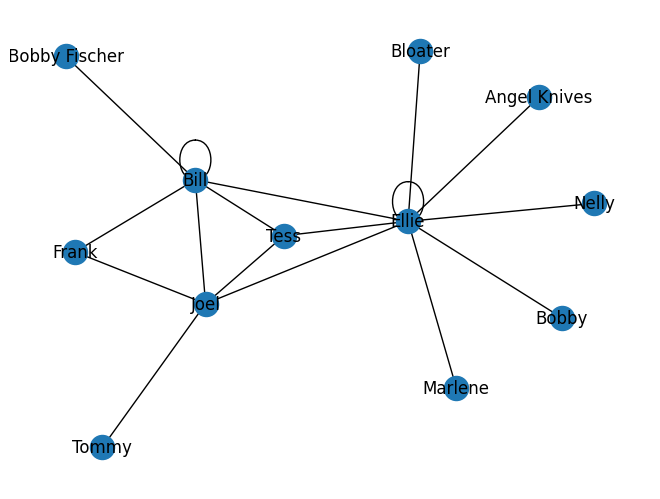

In [ ]:
# Gerando grafo das relações entre os personagens do capítulo 4
import networkx as nx
import matplotlib.pyplot as plt

G3 = nx.Graph()

# Adicionando nós no gráfico usando Char_1 e Char_2
for node in set(dfRelations3['Char_1']).union(set(dfRelations3['Char_2'])):
    G3.add_node(node)

# Adicionando arestas ao gráfico
for idx, row in dfRelations3.iterrows():
    G3.add_edge(row['Char_1'], row['Char_2'])

nx.draw(G3, with_labels=True)
plt.show()


A partir da computação de grau de centralidade e centralidade de intermediação, bem como a criação de grafos e gráficos, são técnicas poderosas que podem ser usadas para analisar as relações entre os personagens e como eles evoluem ao longo do tempo. Ao representar personagens como nós em um gráfico e suas interações como arestas, podemos aplicar ferramentas de análise de rede para estudar as interações mudam com o passar do tempo e identificar os personagens mais influentes em uma história.

In [ ]:
# Calcular grau de centralidade para ambos os grafos
dc1 = nx.degree_centrality(G2)
dc2 = nx.degree_centrality(G3)

# Calcular centralidade de intermediação para ambos os grafos
bc1 = nx.betweenness_centrality(G2)
bc2 = nx.betweenness_centrality(G3)

# Comparar as medidas de centralidade entre os dois gráficos
print(f'Grau de centralidade para o grafo 1: {dc1}')
print(f'Grau de centralidade para o grafo 2: {dc2}')
print(f'Centralidade de intermediação para o grafo 1: {bc1}')
print(f'Centralidade de intermediação para o grafo 2: {bc2}')

Grau de centralidade para o grafo 1: {'Tess': 0.6666666666666666, 'System': 0.06666666666666667, 'Man': 0.26666666666666666, 'Sentry': 0.06666666666666667, 'Sentry 2': 0.2, 'Malick': 0.06666666666666667, 'Guard': 0.06666666666666667, 'Robert': 0.4, 'Plank': 0.06666666666666667, 'Terence': 0.06666666666666667, 'Tommy': 0.06666666666666667, 'Joel': 0.4666666666666667, 'Marianne': 0.06666666666666667, 'Bill': 0.13333333333333333, 'Marlene': 0.4, 'Ellie': 0.13333333333333333}
Grau de centralidade para o grafo 2: {'Tess': 0.2727272727272727, 'Angel Knives': 0.09090909090909091, 'Tommy': 0.09090909090909091, 'Nelly': 0.09090909090909091, 'Bobby Fischer': 0.09090909090909091, 'Joel': 0.4545454545454546, 'Bloater': 0.09090909090909091, 'Bill': 0.6363636363636364, 'Marlene': 0.09090909090909091, 'Bobby': 0.09090909090909091, 'Frank': 0.18181818181818182, 'Ellie': 0.9090909090909092}
Centralidade de intermediação para o grafo 1: {'Tess': 0.4968253968253968, 'System': 0.0, 'Man': 0.13333333333333

In [ ]:
# Comparar os grafos/dicionarios/dataframes para coletar os personagens que aparecem em ambos para fazer uma analise mais relevante
common_keys = dc1.keys() & dc2.keys()
common_keys

{'Bill', 'Ellie', 'Joel', 'Marlene', 'Tess', 'Tommy'}

In [ ]:
# Filtrar apenas os dados dos personagens comuns aos dois grafos para o grafo do capítulo 2
filtered_dict1 = {key: value for key, value in dc1.items() if key in common_keys}
filtered_dict1

{'Tess': 0.6666666666666666,
 'Tommy': 0.06666666666666667,
 'Joel': 0.4666666666666667,
 'Bill': 0.13333333333333333,
 'Marlene': 0.4,
 'Ellie': 0.13333333333333333}

In [ ]:
# Filtrar apenas os dados dos personagens comuns aos dois grafos para o grafo do capítulo 4
filtered_dict2 = {key: value for key, value in dc2.items() if key in common_keys}
filtered_dict2

{'Tess': 0.2727272727272727,
 'Tommy': 0.09090909090909091,
 'Joel': 0.4545454545454546,
 'Bill': 0.6363636363636364,
 'Marlene': 0.09090909090909091,
 'Ellie': 0.9090909090909092}

In [ ]:
#Personagem mais influente de cada capítuilo segundo grau de centralidade sobre o grafo das relações das entidades reconhecidas no dialogos dos personagens
print(f'Personagem mais influente do capítulo 2 : {max(filtered_dict1, key=lambda k: filtered_dict1[k])}')
print(f'Personagem mais influente do capítulo 4 : {max(filtered_dict2, key=lambda k: filtered_dict2[k])}')

Personagem mais influente do capítulo 2 : Tess
Personagem mais influente do capítulo 4 : Ellie


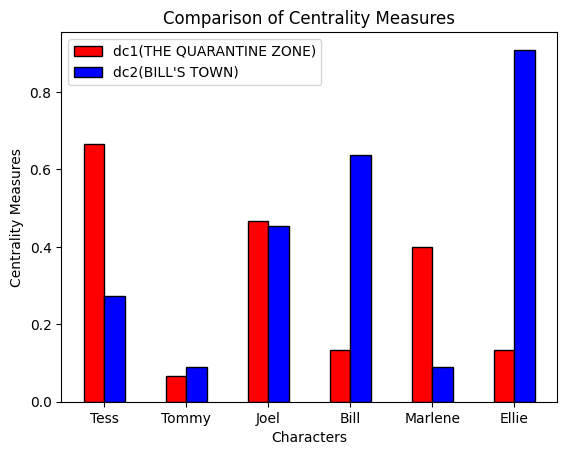

In [ ]:
import matplotlib.pyplot as plt

# Create x and y values for the first dictionary
x1 = list(filtered_dict1.keys())
y1 = list(filtered_dict1.values())

# Create x and y values for the second dictionary
x2 = list(filtered_dict2.keys())
y2 = list(filtered_dict2.values())

# Set the width of the bars
barWidth = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(x1))
r2 = [x + barWidth for x in r1]

# Plot the bars for the first dictionary
plt.bar(r1, y1, color='red', width=barWidth, edgecolor='black', label='dc1(THE QUARANTINE ZONE)')

# Plot the bars for the second dictionary
plt.bar(r2, y2, color='blue', width=barWidth, edgecolor='black', label="dc2(BILL'S TOWN)")

# Set the x-tick labels
plt.xticks([r + barWidth/2 for r in range(len(x1))], x1)

# Add labels to the x-axis and y-axis
plt.xlabel('Characters')
plt.ylabel('Centrality Measures')

# Add a title to the graph
plt.title('Comparison of Centrality Measures')

# Add a legend to the graph
plt.legend()

# Show the graph
plt.show()


Para analisar as relações entre os personagens do jogo presentes no dicionário e como eles mudaram ao longo do tempo, podemos comparar os valores das medidas de centralidade entre os dois dicionários.

É possivel observar que Tess começa com a centralidade mais alta do capítulo 2, mas cai para menos da metade em relação ao segundo no quarto capítulo. Isso talvez se deva pois, Tess desempenha um papel importante na história, acompanhando Joel em sua jornada para contrabandear Ellie para fora da zona de quarentena. Sua forte presença e habilidades de liderança podem ter contribuído para sua alta centralidade na história naquele ponto.

No capítulo 4, no entanto, Tess não está mais presente na história, pois ela é morta no início. Isso pode ter levado a uma diminuição em sua pontuação de centralidade, pois ela não é mais um personagem significativo na história.

Joel como sendo o protagonista principal do jogo se mostra apresenta praticamente constante, sem sofrer grandes auterações nos seus dialogos e como consequencia na sua participação e importancia para história também.

E por fim, vemos que a centralidade de Ellie aumentou consideravelmente do Capítulo 2 para o Capítulo 4.Isso pode ser atribuído ao relacionamento crescente entre Ellie e Joel enquanto eles continuam sua jornada juntos. No Capítulo 2, Ellie ainda é vista como uma criança e suas interações com outros personagens são limitadas. No entanto, à medida que a história avança e Ellie se torna mais integrante da trama, sua centralidade na rede social de personagens aumenta. Além disso, no Capítulo 4, Ellie passa um tempo significativo com Bill, que tem uma alta pontuação de centralidade naquele capítulo.

Isso sugere que as relações entre os personagens mudaram ao longo do tempo, com diferentes personagens se tornando mais ou menos centrais para a história em diferentes capítulos. Seria interessante analisar os diálogos e acontecimentos de cada capítulo para entender porque certos personagens se tornaram mais ou menos importantes em cada capítulo.

## Conclusão
Em conclusão, nossa análise dos diálogos de The Last of Us usando três técnicas de processamento de linguagem natural - análise de sentimentos, modelagem de tópicos e reconhecimento de entidade nomeada - forneceu informações valiosas sobre os personagens, histórias e impacto emocional geral do jogo. Por meio da análise de sentimentos, conseguimos identificar as emoções dominantes retratadas nos diálogos e como elas mudaram ao longo da narrativa do jogo. A modelagem de tópicos nos permitiu descobrir os principais temas e tópicos que emergiram dos diálogos, revelando uma complexa interação entre sobrevivência, perda e esperança. Finalmente, o reconhecimento de entidades nomeadas nos permitiu estudar as relações entre os personagens do jogo e como eles mudaram ao longo do tempo.

No geral, este projeto demonstrou o poder e a versatilidade das técnicas de processamento de linguagem natural na análise e compreensão de narrativas complexas em videogames. Com mais pesquisa e desenvolvimento, essas técnicas podem ser aplicadas a outras formas de mídia, como filmes, livros e programas de televisão, proporcionando uma compreensão mais profunda de seu conteúdo e impacto no público.